<div>
<img src="logo.jpg" width=150 ALIGN="left" style='margin-right:10px; border-style: solid; border-width: 2px;' alt='logo'>
<h1>Starting Kit - Fair-Universe </h1>
<h3>Background and Signal events classification</h3>
<br>
<p>
This starting kit will guide you step by step and will walk you through the data statistics and
examples. This will give you a clear idea of what this challenge is about and how you can
proceed further to solve the challenge.
</p>

<br>
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
<p>
This code was tested with Python 3.10.7 | MSC v.1933 64 bit (AMD64) | (default, Jan 23 2023, 14:12:02) <br>
</p>
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
    
<p>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</p>

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
    <p>
This is a tabular data challenge for <b>Creation of an AI Challenge class</b> at  <b><a style='color: #62023C;' href='https://www.universite-paris-saclay.fr/'>Université Paris Saclay</a></b>
</p>
</div>

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

## Introduction

High energy physicists at CERN use simulations in order to reproduce collisions that occurs in the LHC. Collisions between particles create thousands of smaller particles. Once they developped a theory which predicts the existence of a new particle, physicists run these simulations and seek for evidences of the new particle. To do so, they classify all the particles resulting from a collision between background particles (uninteresting ones that they already know) and signal particles (the ones they are interested in). This is why high-energy physicists are working increasingly closely with machine learning scientists.

To perform this classifications task they are tens of available features about each particle (such as its speed, its energy or some angles measurements). However, the simulations are prone to systematic biases and so it is for the data used for classification, which makes the task harder. Thus, a big challenge is to remove this biases from the data in order to improve the accuracy of classification.

The Fair Universe challenge is a toy-exemple for this problem. Instead of working in a high-dimensional feature space, we consider 2D points that belongs either to signal or background class. The aim is to build a model that classifies them correctly.
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
More formaly, this challenge uses 2-features and 1-class datasets
    
The datasets conistst of some points (or events) features:
1. `x1` for $x_1$-coordinate
2. `x2` for $x_2$-coordinate

The `y` column shows the class of the point : either 1 for signal or 0 for background. 
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
However, the data is plagued with bias. That is, there is a nuisance parameter that affects the points coordinates. For this starting-kit, we assume :

1. **the nuisance parameter affects all the points in the same way** (with no regard to their class)
2. the bias is just diagonal translation. That is, if we call $z$ the value of this nuisance parameter, then the actual coordinates in the dataset of each point $(x_1,x_2)$ is $(x_1+z,x_2+z)$

Then, one would legitimately want to simply remove $z$ to the coordinates of each point, but here is the trick : **the value of the nuisance parameter is unknown**
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

**References and credits:**  

 - Université Paris Saclay (https://www.universite-paris-saclay.fr/)  
 - ChaLearn (http://www.chalearn.org/)  
***

### Formalism (can be skipped in first-reading)

Let a **task** be a tuple $\left(p,\sigma_b,\sigma_s,\theta,l,\tau\right)$. 

Given a task $T$, we call **parameter** each element of $T$.

A context is a tuple $(\sigma,\theta,l)$.

Given a context $C=(\sigma,\theta,l)$, a **point generated in the context of $C$** is the realization of a random variable that follows a bivariate Gaussian law of parameters $(l\cos\theta,l\sin\theta)$ and $\begin{bmatrix}
    \sigma&0\\
    0&\sigma
\end{bmatrix}$

Given a nuisance direction $\alpha$ and a nuisance value $z$, let $\tau_{\alpha,z} : (\hat{x_1},\hat{x_2}) \mapsto (x_1,x_2) := (x_1+z\cos\alpha,x_2+z\sin\alpha)$.

Given a context $C$, $\alpha$ and $z$, a **labelled event for $z$ in the direction $\alpha$ in the context $C$** is a tuple $(x_1,x_2,c)$, where $(x_1,x_2)$ is the image by $\tau_{\alpha,z}$ of a point generated in the context of $C$.

Given a task $T = \left(p,\sigma_b,\sigma_s,\theta,l,\tau\right)$ and $z$, a **dataset for $T$ plagued by $z$** is a set containing $2000p$ labelled events for $z$ in the direction $\alpha$ in the context $(\sigma_b,\theta,l)$ and $2000(1-p)$ labelled events for $z$ in the direction $\alpha$ in the context $(\sigma_s,\theta,l)$.

For each labelled event $(x_1,x_2,c)$, we define its associated **event** $(x_1,x_2)$ and its **class** $c$.

The aim of this challenge is to build a learning model that, for any task, most accurately predicts the class of events no matter what nuisance value was used to generate them.

That is, your model has to be :
- in one hand, insensitive to the nuisance parameter $z$
- in the other hand, compliant to any task.

***
### Summary
The aim is to classify 2D data-points into signal or background classes. To do so, you are provided with several datasets, generated with different values of the nuissance parameter $z$. 

***

# Import from Github

In [3]:
# !git clone https://github.com/ihsaan-ullah/fair-universe
# %cd fair-universe/starting_kit

# Imports

In [4]:
import os
import numpy as np
import pandas as pd
from sys import path
from copy import deepcopy
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## Directories

In [5]:
model_dir = 'sample_code_submission/'
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

### Add directories to path

In [6]:
path.append(model_dir) 
path.append(problem_dir)
path.append(score_dir)
path.append("../Data_Generator")

***
# 0 - Generate Data
***

**Imports**

In [7]:
#from data_loader import get_settings_from_json
#from data_generator_new import DataGenerator

In [8]:
#data_gen_settings = get_settings_from_json()
# data_gen_settings = [data_gen_settings[-1]]
#for index, settings in enumerate(data_gen_settings):
    #data_gen = DataGenerator(settings_dict=settings)
    #data_gen.load_settings()
    #data_gen.generate_data()
    #data_gen.save_data(directory="sample_data", file_index=index+1)
    

***
# 1 - Import Data
***

In the previous step, we have generated 6 datasets, each having an unbiased train set and a biased test set. The bias is added by translating the test distribution with a certain value of nuissance parameter $z$.

Each dataset consists of 1800 train samples and 200 test samples. Each sample belongs to either class *background* or *signal*. Both signal and background points ar 2D and generated using Gaussian distributions using different parameters of each class.



**Classes**:
- Background (0)
- Signal (1)

The data generated in previous step is stores in the directory `sample_data`. This data is used in this notebook to 
- uderstand the problem
- use baselines
- produce predictions
- compute scores
- create submission files

In order to produce a submission with real data, dowload `public_data` from the challenge website.

**Note:**  
For `sample_data` we have provided the distribution parameters $\mu$ and $\sigma$ and the nuissance parameter $z$ but for `public_data` these parameters will not be provided.

In [9]:
from data_io import load_data, show_data_statistics, write

In [10]:
data_name = 'fair_universe_challenge'
data_dir = 'sample_data' 

In [11]:
train_sets, test_sets, settings = load_data(data_dir, load_settings=True)



###-------------------------------------###
### Data Loading
###-------------------------------------###

[*] data dir :  sample_data
[*] train data dir :  sample_data/train/data
[*] train labels dir :  sample_data/train/labels
[*] test data dir :  sample_data/test/data
[*] test labels dir :  sample_data/test/labels
[*] settings dir :  sample_data/settings
[+] train data dir found
[+] train labels dir found
[+] test data dir found
[+] test labels dir found
[+] settings dir found
[+] 6 train and test sets found
---------------------------------
[+] Train and Test data loaded!
---------------------------------




### Data Statistics

In [12]:
show_data_statistics(train_sets, name="Train")

###-------------------------------------###
### Data Statistics Train
###-------------------------------------###
-------------------
Set 1
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 2
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 3
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 4
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 5
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 6
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199


In [13]:
show_data_statistics(test_sets, name="Test")

###-------------------------------------###
### Data Statistics Test
###-------------------------------------###
-------------------
Set 1
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 2
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 3
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 4
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 5
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 6
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199


**Data Visualization**

In [14]:
from visualize import (
    visualize_decicion_boundary,
    visualize_augmented_data,
    visualize_data,
    visualize_clocks
)

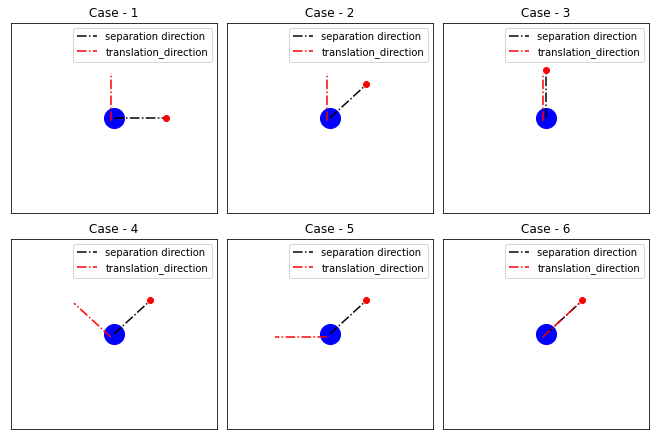

In [15]:
visualize_clocks(settings)

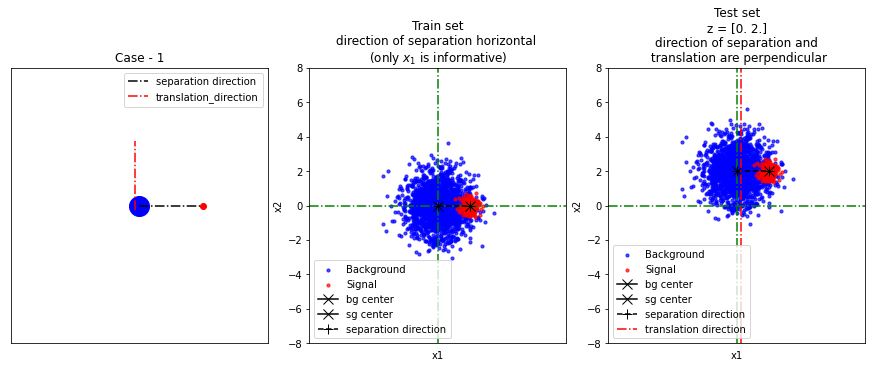

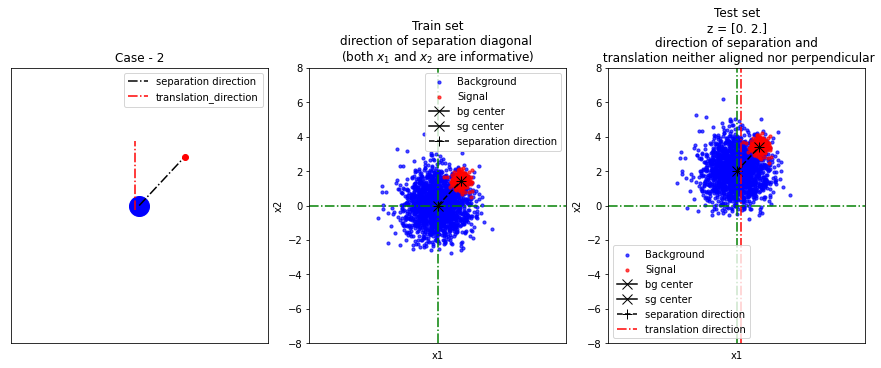

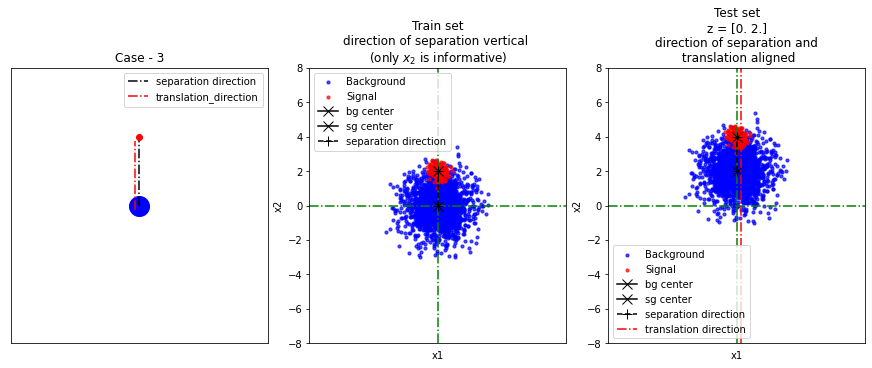

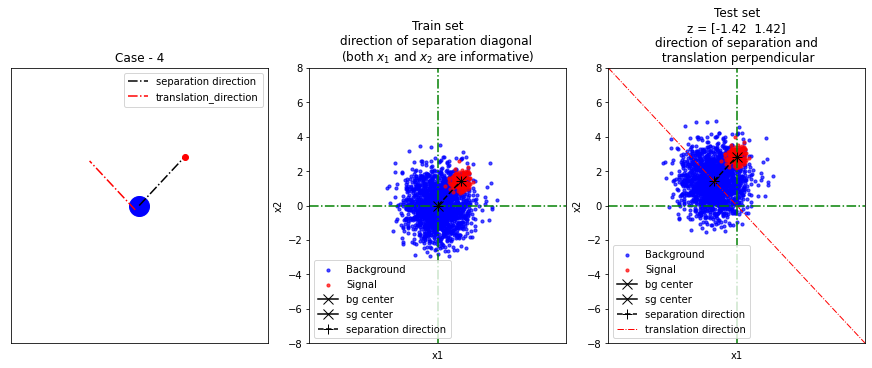

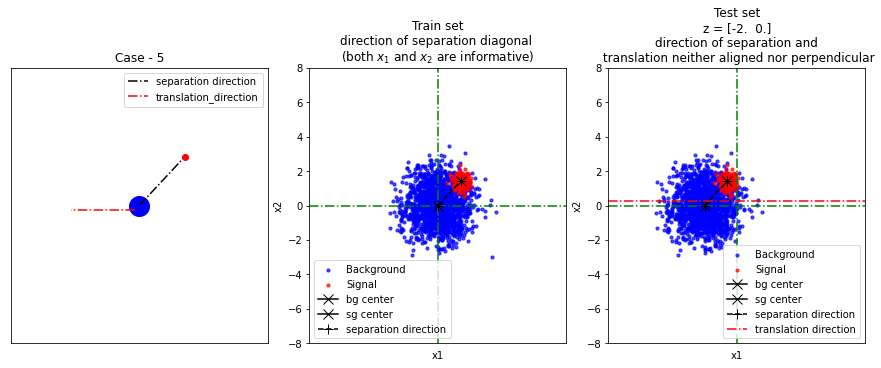

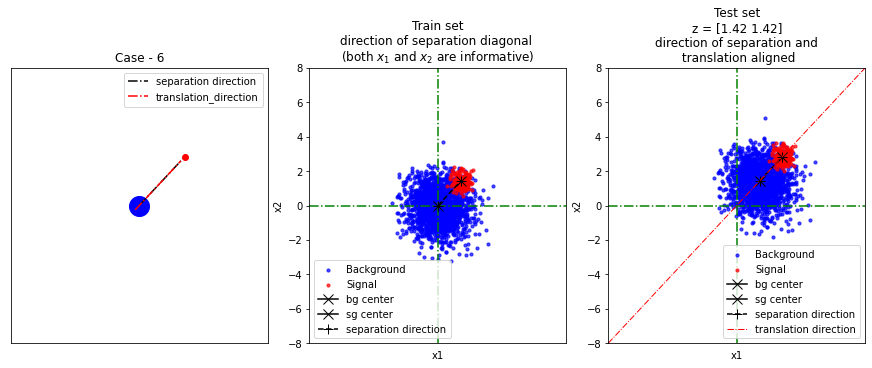

In [16]:
for index, _ in enumerate(train_sets):
    visualize_data(settings[index], train_sets[index], test_sets[index])

***
# 2 - Data Augmentation
***

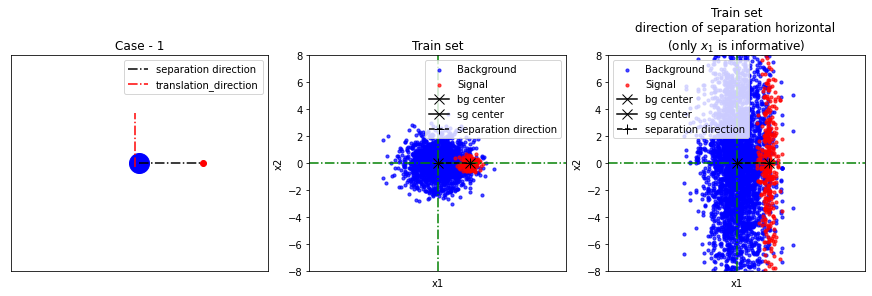

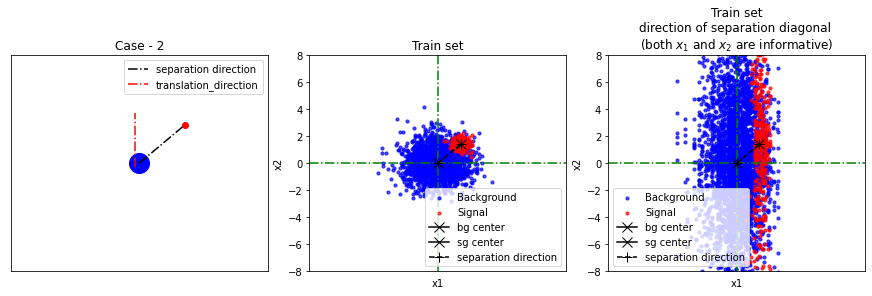

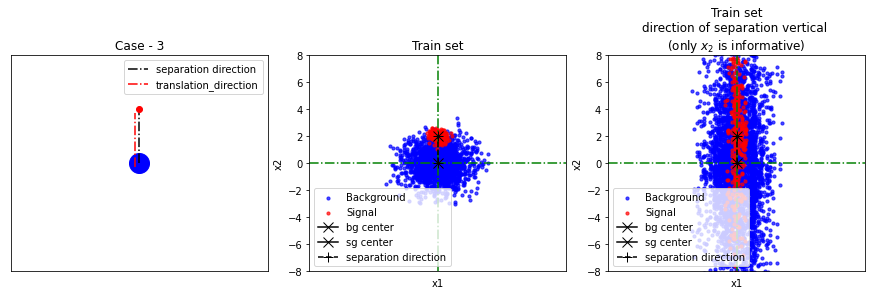

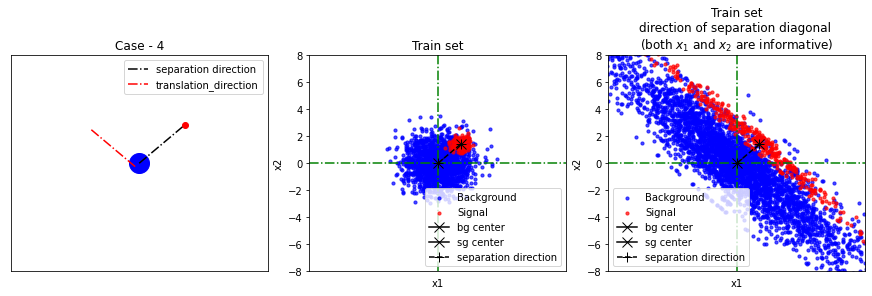

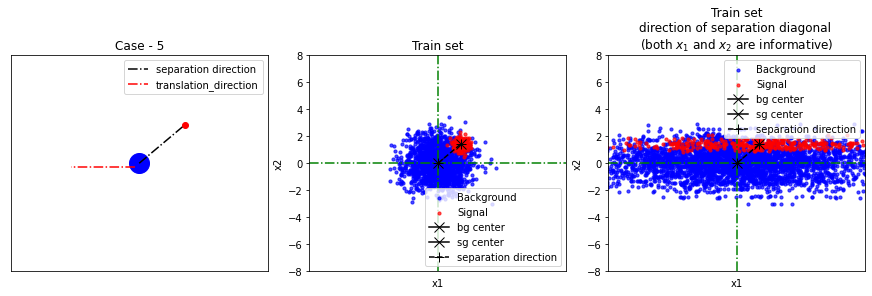

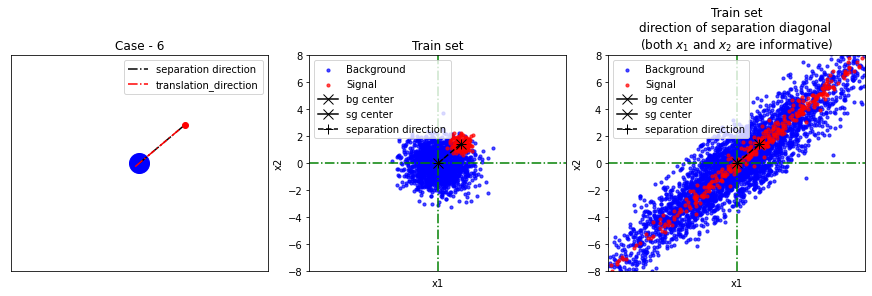

In [17]:
from augment_data import get_augmented_data

for i, _ in enumerate(train_sets):
    augmented_set = get_augmented_data(train_sets[i],  test_sets[i])
    visualize_augmented_data(settings[i], train_sets[i], augmented_set)

***
# 3 - Preprocessing
***

In [18]:
train_sets_preprocessed, test_sets_preprocessed = [], []
for train_set, test_set in zip(train_sets, test_sets):
    
    train_mean = np.mean(train_set["data"]).values
    test_mean = np.mean(test_set["data"]).values

    train_sets_preprocessed.append({
        "data" : train_set["data"] + train_mean - test_mean, 
        "labels" : train_set["labels"] 
    })

    test_sets_preprocessed.append({
        "data" : test_set["data"] + train_mean - test_mean, 
        "labels" : test_set["labels"] 
    })


***
# 4 - Baselines
***

In this section, we introduce the following baselines:

1. Constant model
2. NB plain
3. NB preprocessing
4. LDA plain
5. RR plain
6. NB data augmentation
7. LDA data augmentation
8. RR data augmentatio

**Import Model and Scoring function**

In [19]:
from model import Model
from metric import auc_metric, bac_metric

**Model Description**
### MLP
Multilayer Perceptron (MLP) is a type of artificial neural network used for classification and regression tasks. MLP consists of multiple layers of nodes, where each node in one layer is connected to every node in the next layer. The nodes in each layer apply an activation function to the weighted sum of their inputs to produce their output. The weights of the connections between the nodes are learned through backpropagation, which is an iterative algorithm that adjusts the weights based on the error between the predicted outputs and the actual outputs of the training data. MLP can handle both categorical and numerical features, and it can handle non-linear decision boundaries by using multiple layers of nodes. MLP is a powerful algorithm that can achieve state-of-the-art results on many complex classification and regression tasks, but it can be computationally expensive for large datasets or complex architectures. MLP requires careful tuning of its hyperparameters, such as the number of layers, the number of nodes per layer, and the learning rate, to achieve good performance. MLP is a popular algorithm that has been used in many applications, such as speech recognition, image classification, and natural language processing.
### Decision Tree
Decision Tree is used for classification and regression tasks. Decision Tree builds a tree-like model of decisions and their possible consequences based on a set of training data. The tree is built by recursively splitting the data based on the values of the features that maximize the information gain or minimize the impurity of the resulting subsets. The resulting tree can be interpreted as a set of rules that can be used for making predictions on new data. Decision Tree is a simple and interpretable algorithm that can handle both categorical and numerical features, and it can handle missing data without the need for imputation. Decision Tree is prone to overfitting when the tree is too complex or the training data is noisy, so pruning techniques and regularization methods are often used to prevent overfitting. Decision Tree is a popular algorithm that has been used in many applications, such as medical diagnosis, credit scoring, and customer segmentation.
### Random Forest
Random Forest is used for classification and regression tasks. Random Forest is an ensemble algorithm that combines multiple decision trees to form a strong classifier that can generalize well to new data. Each tree in the forest is built on a randomly selected subset of the training data and a randomly selected subset of the features. This randomization helps to reduce overfitting and increase the diversity of the trees in the forest. The final prediction is made by averaging the predictions of the individual trees in the forest. Random Forest is a versatile algorithm that can handle both categorical and numerical features, and it can handle missing data without the need for imputation. Random Forest can also provide estimates of the importance of each feature in the classification task, which can be useful for feature selection and understanding the underlying data. Random Forest is a popular algorithm that has been used in many applications, such as image classification, bioinformatics, and financial forecasting.
### SVM
Support Vector Machine (SVM) is used for both classification and regression tasks. SVM tries to find the best separating hyperplane in a high-dimensional feature space that maximizes the margin between the two classes. The margin is the distance between the hyperplane and the nearest data points of each class. SVM can handle linear and non-linear decision boundaries by using different kernel functions that map the original data to a higher-dimensional space where a linear boundary can be found. The algorithm tries to find the hyperplane that maximizes the margin and minimizes the classification error, which is the number of misclassified examples. SVM can handle both linearly separable and non-separable datasets by introducing a regularization parameter that controls the trade-off between margin maximization and error minimization. SVM is a powerful and flexible algorithm that can achieve good results on a wide range of classification and regression problems, but it can be computationally expensive for large datasets and requires careful tuning of its hyperparameters.
### KNN
K nearest neighbor (KNN) is used for classification and regression tasks. KNN is a non-parametric, lazy learning algorithm that works by finding the K nearest data points to a given query point and using their labels (in the case of classification) or values (in the case of regression) to make a prediction for the query point. The algorithm does not make any assumptions about the underlying distribution of the data and can be used for both linear and non-linear decision boundaries. The value of K is a hyperparameter that needs to be tuned for the specific problem at hand. Larger values of K can lead to smoother decision boundaries, but may also increase the risk of overfitting to the training data. KNN is a simple and effective algorithm that can achieve good results on a variety of problems, but it can be computationally expensive for large datasets or high-dimensional feature spaces.
### Ada
AdaBoost (short for "Adaptive Boosting") is a machine learning algorithm that belongs to the family of ensemble methods. Ensemble methods combine multiple "weak" learning algorithms to form a "strong" classifier that performs better than any of the individual weak classifiers. AdaBoost is an iterative algorithm that trains a sequence of weak classifiers on weighted versions of the training data. The weights of the training examples are adjusted after each iteration to give more emphasis to the examples that were misclassified in the previous iteration. In each iteration, a weak classifier is trained to minimize the weighted training error, and the contribution of this classifier to the final classifier is determined based on its training error rate. The final classifier is a linear combination of the weak classifiers, where the weights of the classifiers are determined based on their error rates. AdaBoost has proven to be a very effective algorithm for classification and has been used in many applications, such as face detection, speech recognition, and web search.

**Model Names and settings**

In [20]:
model_settings = [
    #{"display_name" : "constant model", "model_name": "Constant", "preprocessing" : False, "data_augmentation" : False},
    #{"display_name" : "NB plain", "model_name": "NB", "preprocessing" : False, "data_augmentation" : False},
    #{"display_name" : "NB preprocessing", "model_name": "NB", "preprocessing" : True, "data_augmentation" : False},
    #{"display_name" : "LDA plain", "model_name": "LDA", "preprocessing" : False, "data_augmentation" : False},
    #{"display_name" : "RR plain", "model_name": "RR", "preprocessing" : False, "data_augmentation" : False},
    #{"display_name" : "NB data augmentation", "model_name": "NB", "preprocessing" : False, "data_augmentation" : True},
    #{"display_name" : "LDA data augmentation", "model_name": "LDA", "preprocessing" : False, "data_augmentation" : True},
    #{"display_name" : "RR data augmentation", "model_name": "RR", "preprocessing" : False, "data_augmentation" : True},
    
    {"display_name" : "Tree plain", "model_name": "Tree", "preprocessing" : False, "data_augmentation" : False},
    {"display_name" : "Tree pre-processing", "model_name": "Tree", "preprocessing" : True, "data_augmentation" : False},
    
    {"display_name" : "MLP plain", "model_name": "MLP", "preprocessing" : False, "data_augmentation" : False},
    {"display_name" : "MLP pre-processing", "model_name": "MLP", "preprocessing" : True, "data_augmentation" : False},
    # MultiLayerPerceptron is a type of neural network. It consists of multiple layers
    # of nodes, where each node is connected to all the nodes in the previous layer. The nodes in the MLP perform mathematical 
    # computations on the input data, and the outputs from one layer are used as inputs to the next layer. The final output of 
    # the MLP is a prediction based on the input data.
    
    {"display_name" : "Random forest plain", "model_name": "RF", "preprocessing" : False, "data_augmentation" : False},
    {"display_name" : "Random forest pre-processing", "model_name": "RF", "preprocessing" : True, "data_augmentation" : False},
    # Random Forest is an ensemble learning algorithm that uses multiple decision trees to make a prediction.
    # Each tree in the Random Forest is trained on a subset of the data, and the final prediction is made by aggregating the 
    # predictions from all the individual trees. Random Forests are a popular and versatile approach for solving classification 
    # problems and are known to produce excellent results in various applications
    
    
    {"display_name" : "SVM plain", "model_name": "SVM", "preprocessing" : False, "data_augmentation" : False},
    {"display_name" : "SVM pre-processing", "model_name": "SVM", "preprocessing" : True, "data_augmentation" : False},
    # Support Vector Machine is a type of supervised learning algorithm used for classification and regression analysis.
    # SVM works by finding the hyperplane that best separates the data into different classes. 
    # The hyperplane is chosen such that it maximizes the margin between the different classes. 
    # SVM can handle both linear and non-linear data by using different types of kernels that is why it can be useful here.
    
    {"display_name" : "KNeighbors plain", "model_name": "KN", "preprocessing" : False, "data_augmentation" : False},
    {"display_name" : "KNeighbors pre-processing", "model_name": "KN", "preprocessing" : True, "data_augmentation" : False},
    
    {"display_name" : "ADA plain", "model_name": "ADA", "preprocessing" : False, "data_augmentation" : False},
    {"display_name" : "ADA pre-processing", "model_name": "ADA", "preprocessing" : True, "data_augmentation" : False},
    
    
]

**Train and Test**  

- Load Data
- Train Model
- Get Predictions
- Get Score
- Get Metric Scores
- Save Predictions
- Save Scores


In [21]:
#---------------------------------
# Load Data
#---------------------------------
# Train set
X_Trains = [train_set["data"] for train_set in train_sets]
Y_Trains = [train_set["labels"] for train_set in train_sets]

# Test set
X_Tests = [test_set["data"] for test_set in test_sets]
Y_Tests = [test_set["labels"] for test_set in test_sets]


print("############################################")
print("### Training Program")
print("############################################")

#---------------------------------
# Loop over model settings
#---------------------------------
results = []
for model_setting in model_settings:

    print("\n--------------------------------------------")
    print("[*] Model : {} --- Preprocessing: {} --- Data Augmentation: {}".format(model_setting["model_name"], model_setting["preprocessing"], model_setting["data_augmentation"]))
    print("--------------------------------------------")
    #---------------------------------
    # Predictions Directory
    #---------------------------------
    # result directory 
    predictions_dir = os.path.join(result_dir, model_setting["model_name"])
    # create result directory if not created
    if not os.path.exists(predictions_dir):
        os.mkdir(predictions_dir) 

    #---------------------------------
    # Loop over datasets
    #---------------------------------
    trained_models = []
    Y_hat_trains, Y_hat_score_trains = [], []
    Y_hat_tests, Y_hat_score_tests = [], []
    auc_trains, auc_tests, bac_trains, bac_tests = [],[],[],[]
    for index, _ in enumerate(X_Trains):

        print("\n\tDataset : {}".format(index+1))
        print("\t----------------")

        #---------------------------------
        # Constant predictions for Constatnt model
        #---------------------------------
        if model_setting["model_name"] == "Constant":

            # Get Predictions
            print("\t[*] Get Predictions")
            Y_hat_trains.append(np.zeros(X_Trains[index].shape[0]))
            Y_hat_tests.append(np.zeros(X_Tests[index].shape[0]))
            
            # Get Scores
            print("\t[*] Get Scores")
            Y_hat_score_trains.append(np.zeros(X_Trains[index].shape[0]))
            Y_hat_score_tests.append(np.zeros(X_Tests[index].shape[0]))

            trained_models.append(None)

            
        #---------------------------------
        # All other models
        #---------------------------------
        else:
            # model_name 
            trained_model_name = model_dir + model_setting["model_name"]

            #---------------------------------
            # Load Model
            #---------------------------------
            print("\t[*] Loading Model")
            model = Model(
                model_setting["model_name"],
                X_Trains[index],
                Y_Trains[index],
                X_Tests[index],
                model_setting["preprocessing"],
                model_setting["data_augmentation"]
            )
            # Load Trained Model 
            # model = model.load(trained_model_name) 

            #---------------------------------
            # Train Model
            #---------------------------------
            # Train model if not trained
            print("\t[*] Training Model")
            if not(model.is_trained):
                model.fit() 

            #---------------------------------
            # Get Predictions
            #---------------------------------
            print("\t[*] Get Predictions")
            Y_hat_trains.append(model.predict())
            Y_hat_tests.append(model.predict())
            
            #---------------------------------
            # Get Scores/Proba
            #---------------------------------
            print("\t[*] Get Scores")
            Y_hat_score_trains.append(model.decision_function())
            Y_hat_score_tests.append(model.decision_function())

            trained_models.append(model)

        #---------------------------------
        # Get Metric Scores
        #---------------------------------
        print("\t[*] Computing Scores using AUC and BAC")
        auc_trains.append(round(auc_metric(Y_Trains[index], Y_hat_score_trains[-1]), 2))
        auc_tests.append(round(auc_metric(Y_Tests[index], Y_hat_score_tests[-1]), 2))
        bac_trains.append(round(bac_metric(Y_Trains[index], Y_hat_trains[-1]), 2))
        bac_tests.append(round(bac_metric(Y_Tests[index], Y_hat_tests[-1]), 2))


        #---------------------------------
        # Save Predictions
        #---------------------------------
        print("\t[*] Saving Predictions and Scores")
        # prediction file name
        prediction_name_train = os.path.join(predictions_dir, "train_"+ str(index+1) + ".predictions")
        prediction_name_test = os.path.join(predictions_dir, "test_"+ str(index+1) + ".predictions")

        # score file name
        score_name_train = os.path.join(predictions_dir, "train_"+ str(index+1) + ".scores")
        score_name_test = os.path.join(predictions_dir, "test_"+ str(index+1) + ".scores")
        
        # save prediction
        write(prediction_name_train, Y_hat_score_trains[-1])
        write(prediction_name_test, Y_hat_score_tests[-1])

        # save score
        write(score_name_train, Y_hat_score_trains[-1])
        write(score_name_test, Y_hat_score_tests[-1])
    


    
    results.append({
        "trained_models" : trained_models,
        "Y_hat_trains" : Y_hat_trains,
        "Y_hat_tests" : Y_hat_tests,
        "Y_hat_score_trains" : Y_hat_score_trains,
        "Y_hat_score_tests" : Y_hat_score_tests,
        "auc_trains" : auc_trains,
        "auc_tests" : auc_tests,
        "bac_trains" : bac_trains,
        "bac_tests" : bac_tests,
    })

############################################
### Training Program
############################################

--------------------------------------------
[*] Model : Tree --- Preprocessing: False --- Data Augmentation: False
--------------------------------------------

	Dataset : 1
	----------------
	[*] Loading Model
	[*] Training Model
	[*] Get Predictions
	[*] Get Scores
	[*] Computing Scores using AUC and BAC
	[*] Saving Predictions and Scores

	Dataset : 2
	----------------
	[*] Loading Model
	[*] Training Model
	[*] Get Predictions
	[*] Get Scores
	[*] Computing Scores using AUC and BAC
	[*] Saving Predictions and Scores

	Dataset : 3
	----------------
	[*] Loading Model
	[*] Training Model
	[*] Get Predictions
	[*] Get Scores
	[*] Computing Scores using AUC and BAC
	[*] Saving Predictions and Scores

	Dataset : 4
	----------------
	[*] Loading Model
	[*] Training Model
	[*] Get Predictions
	[*] Get Scores
	[*] Computing Scores using AUC and BAC
	[*] Saving Predictions and Sc

***
# 5 - Decision Boundries
***

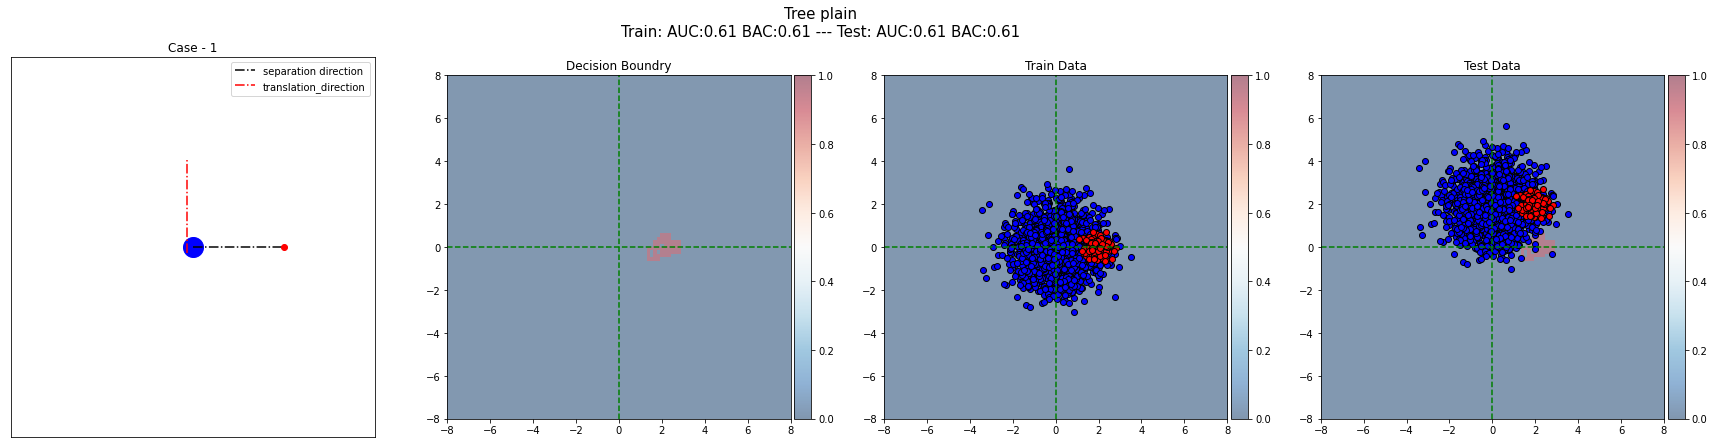

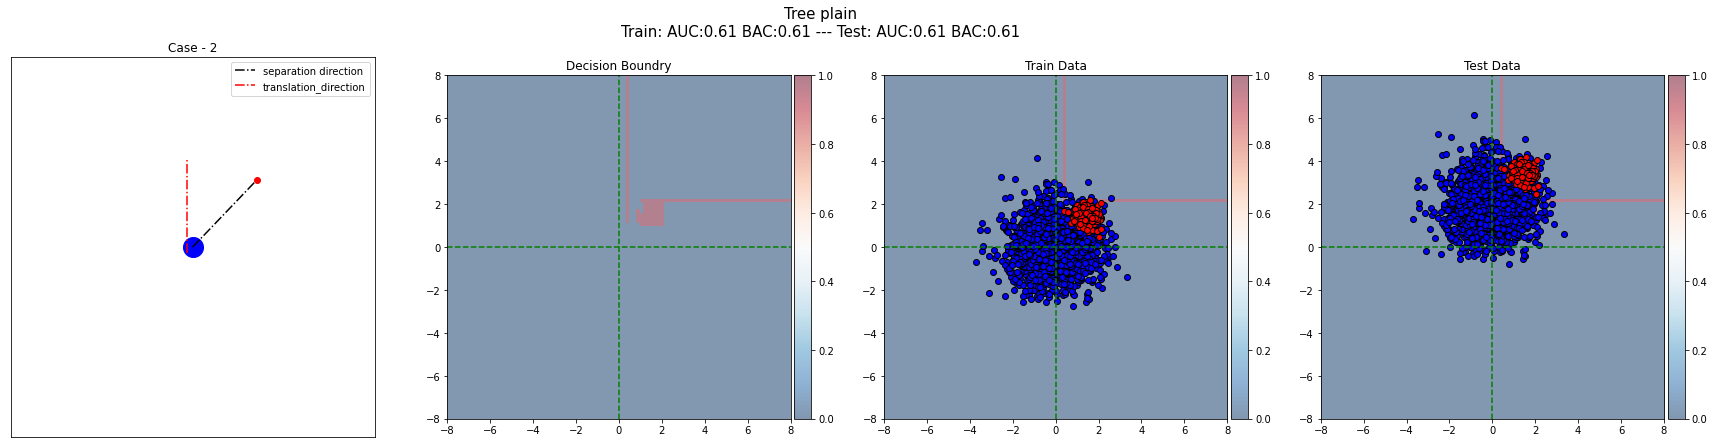

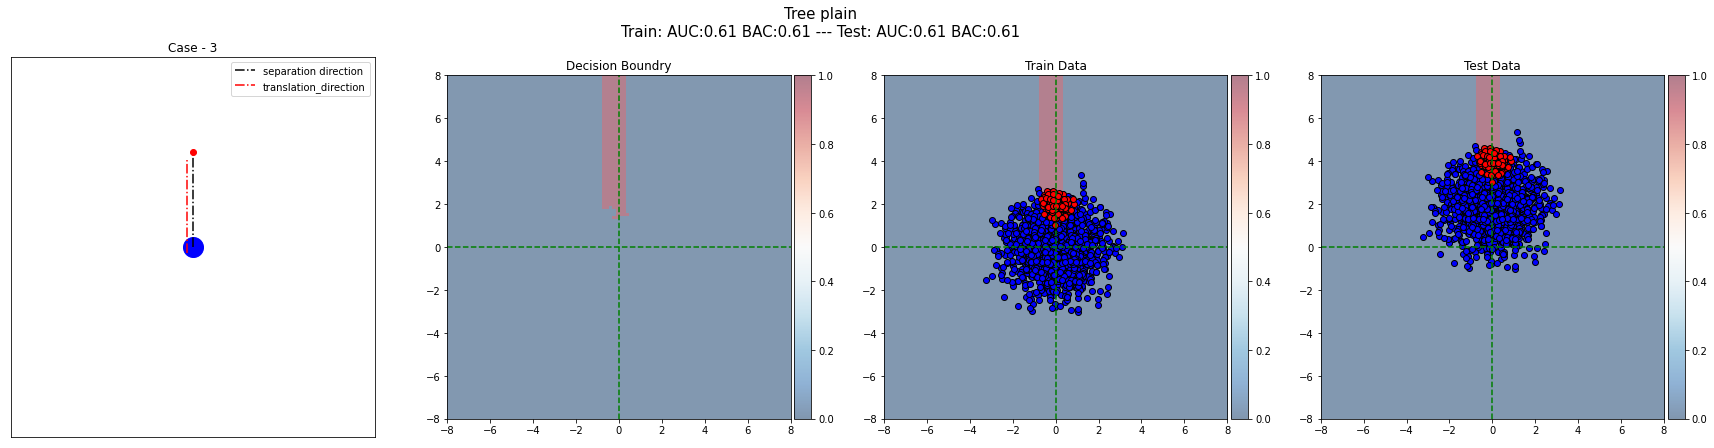

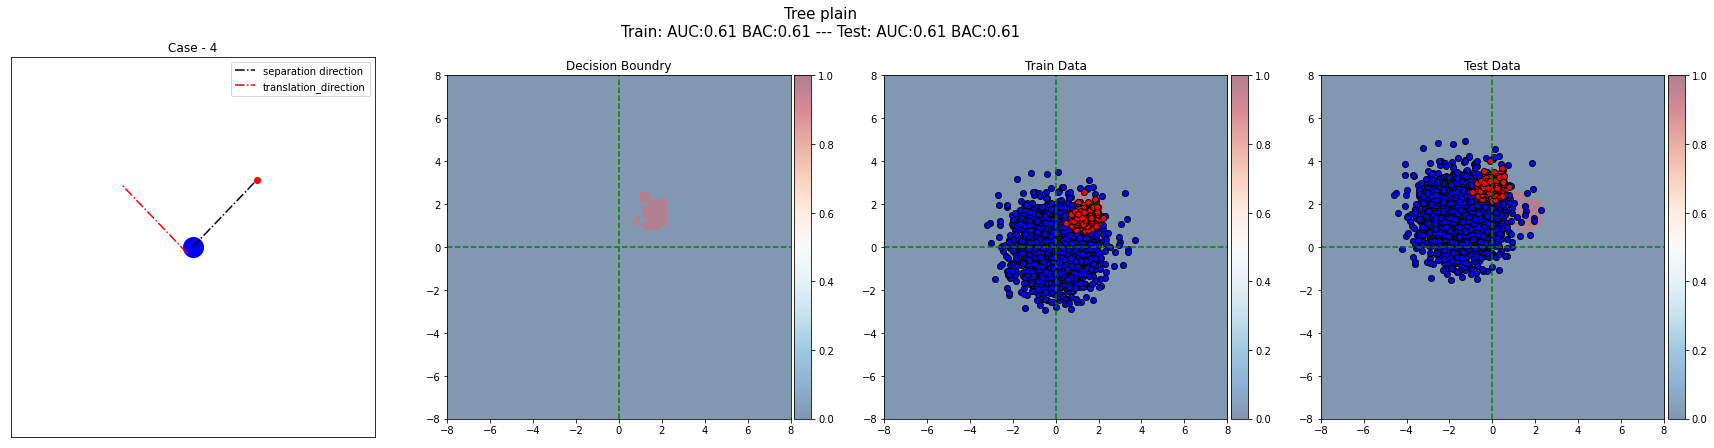

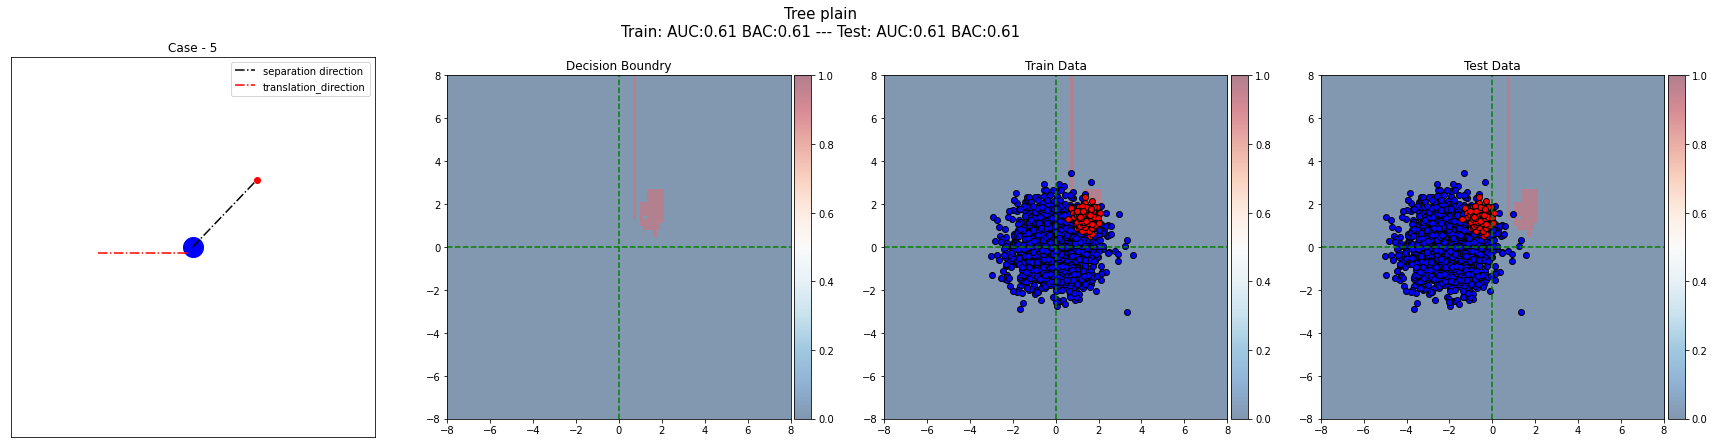

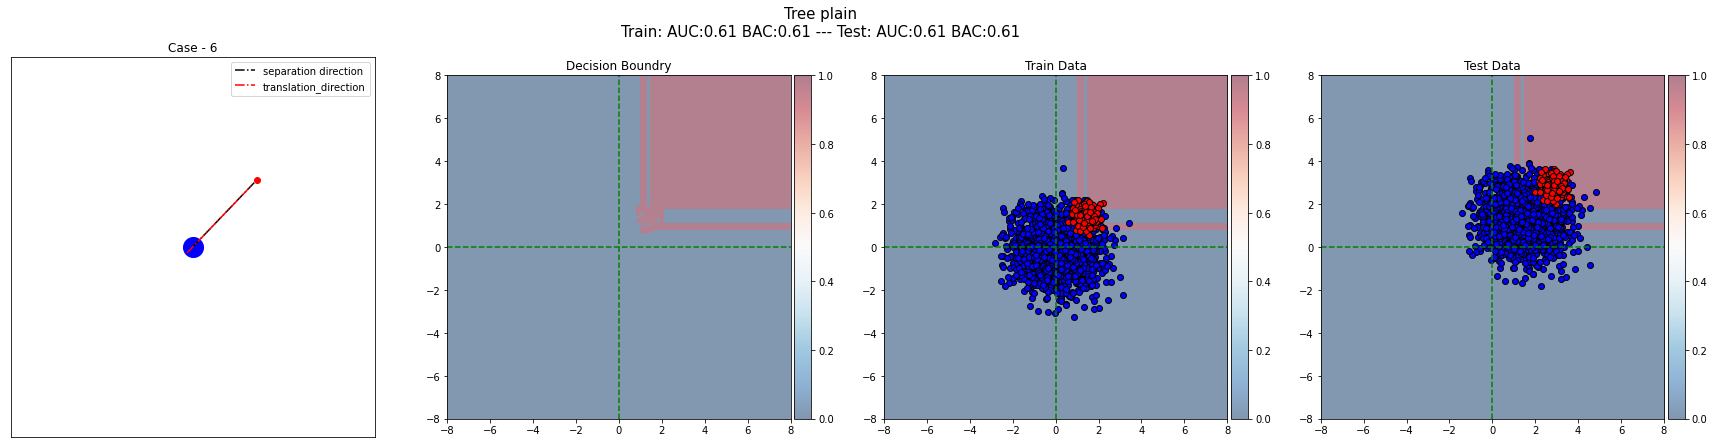

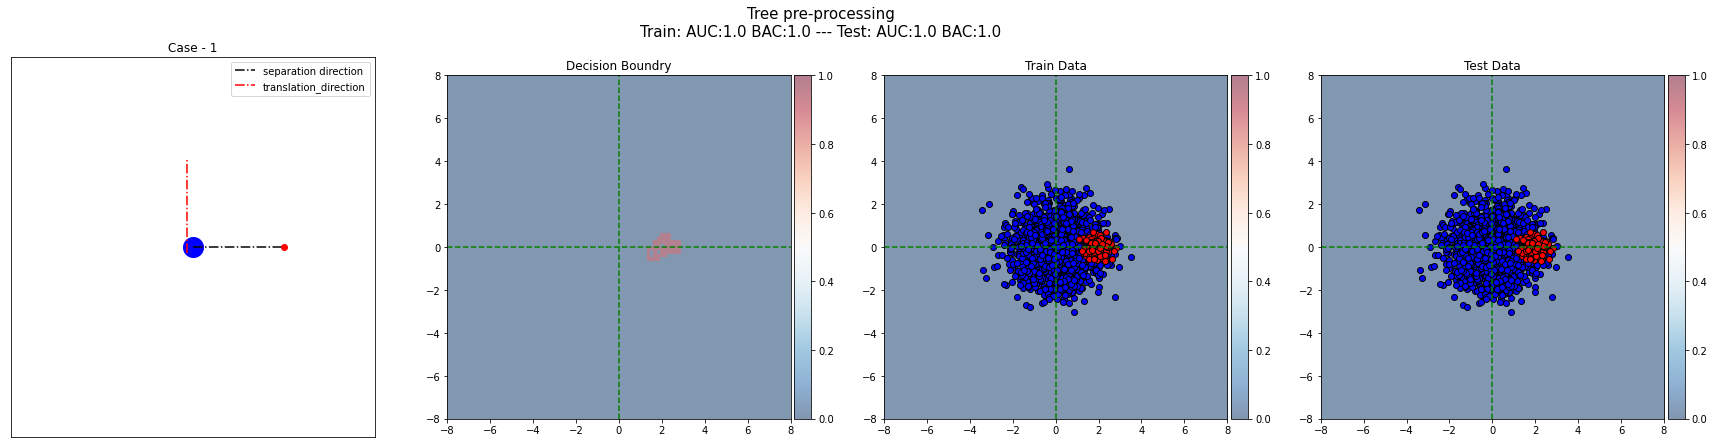

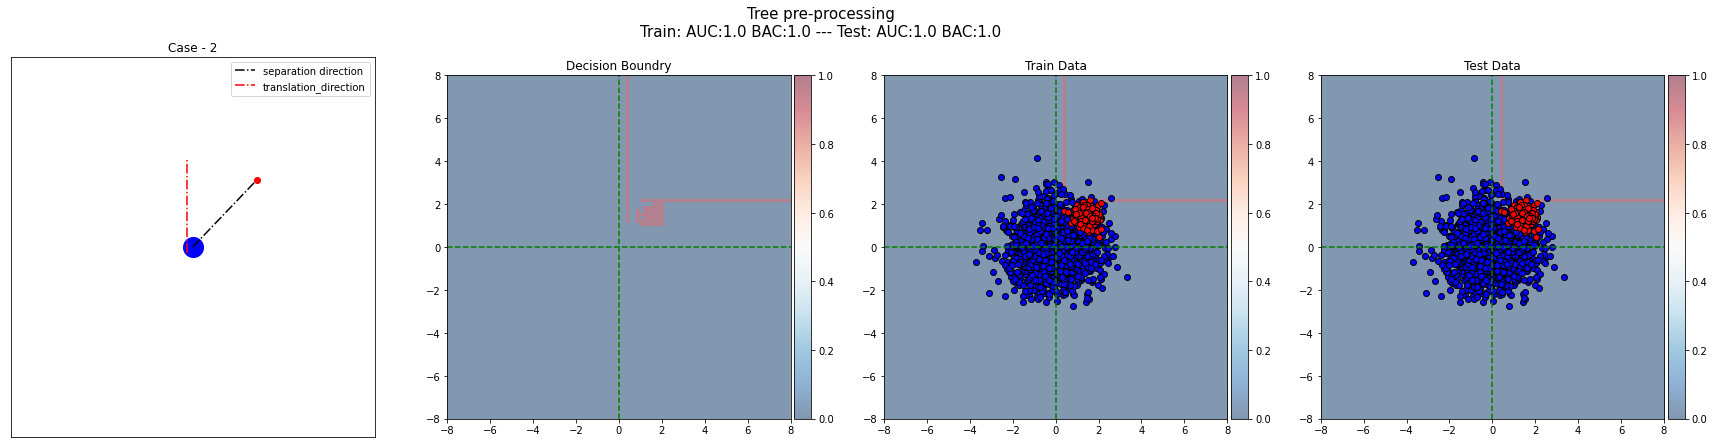

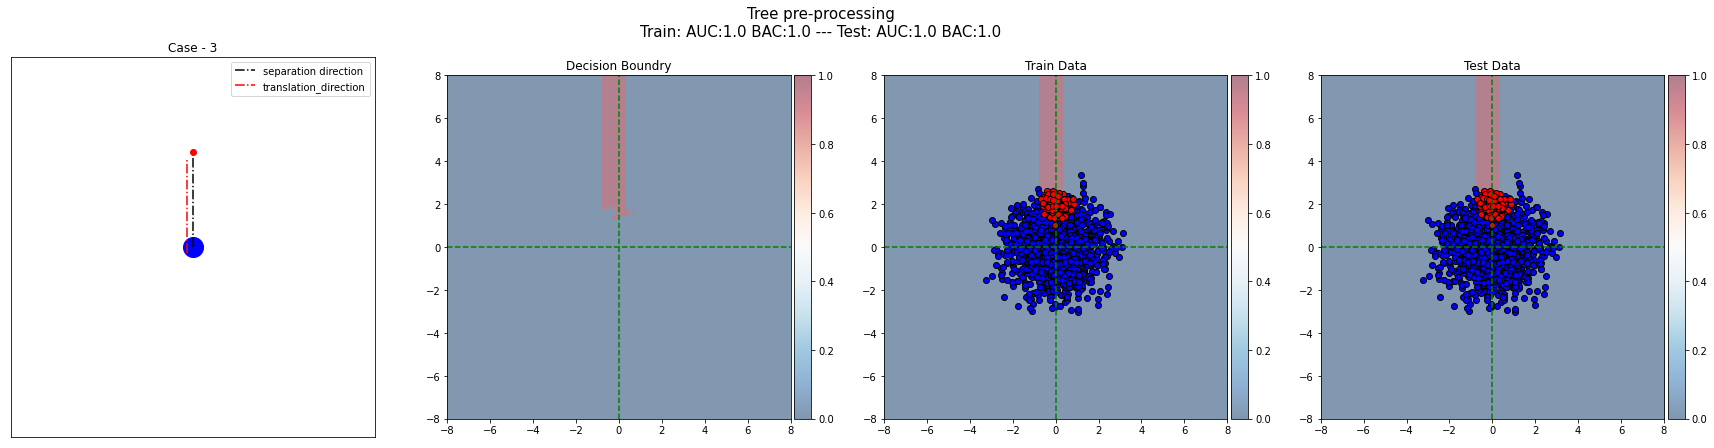

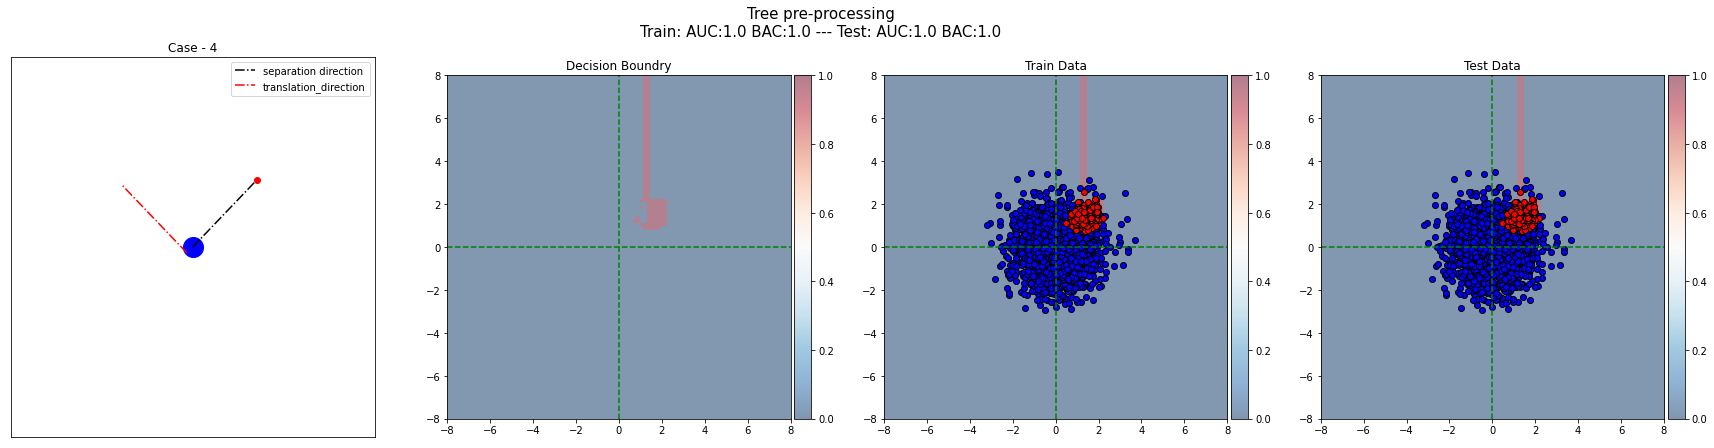

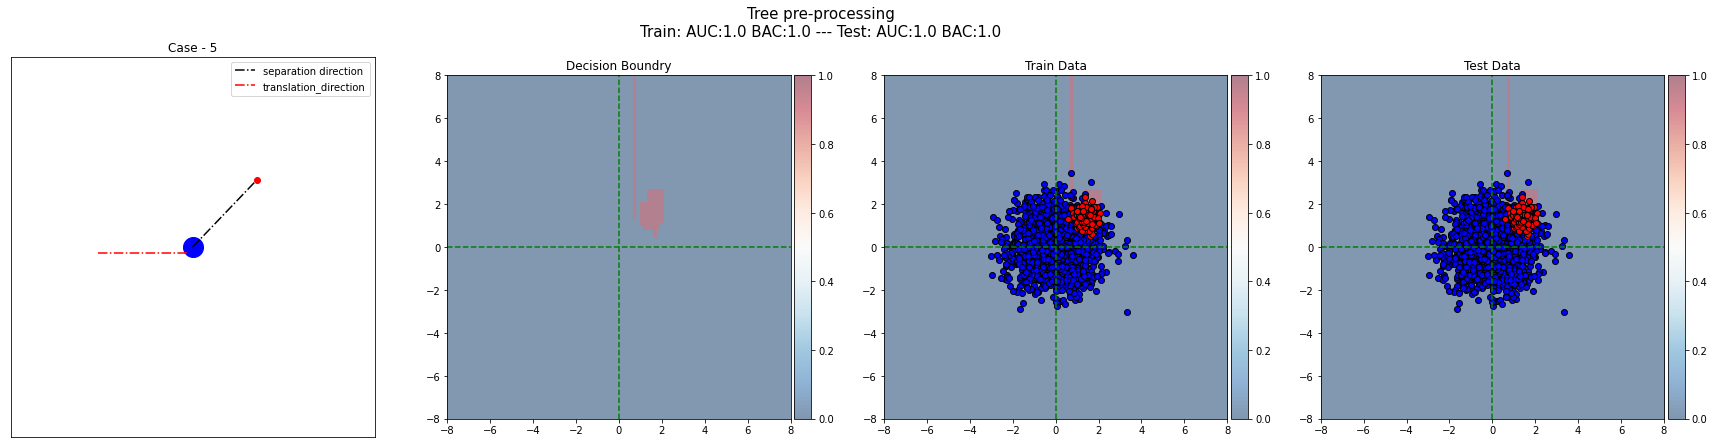

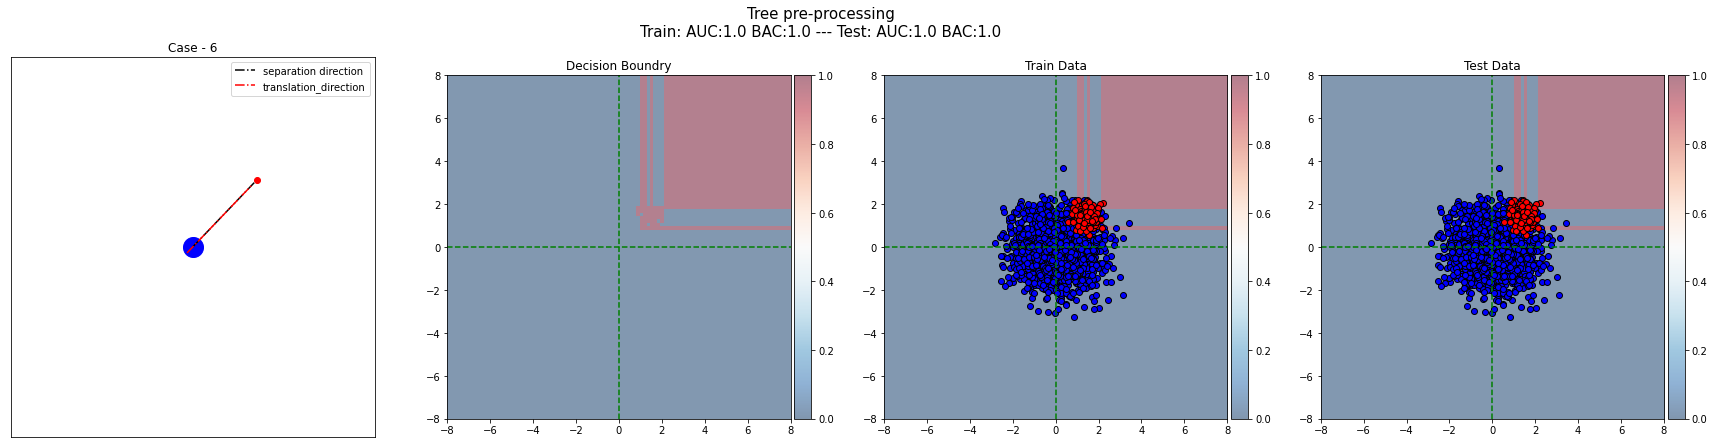

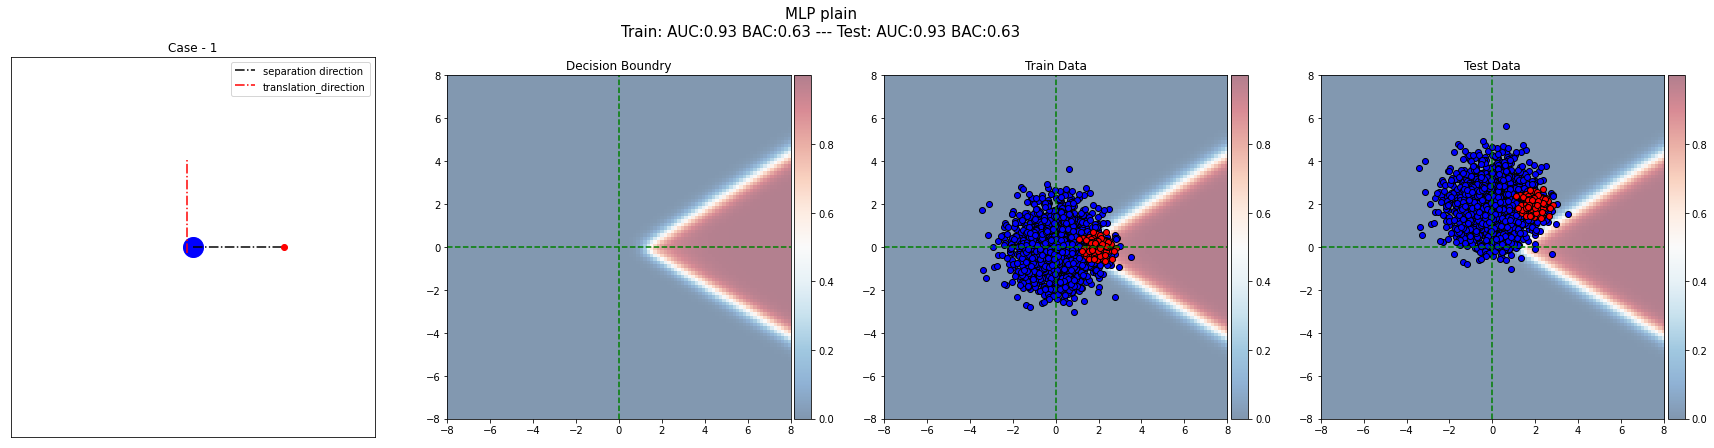

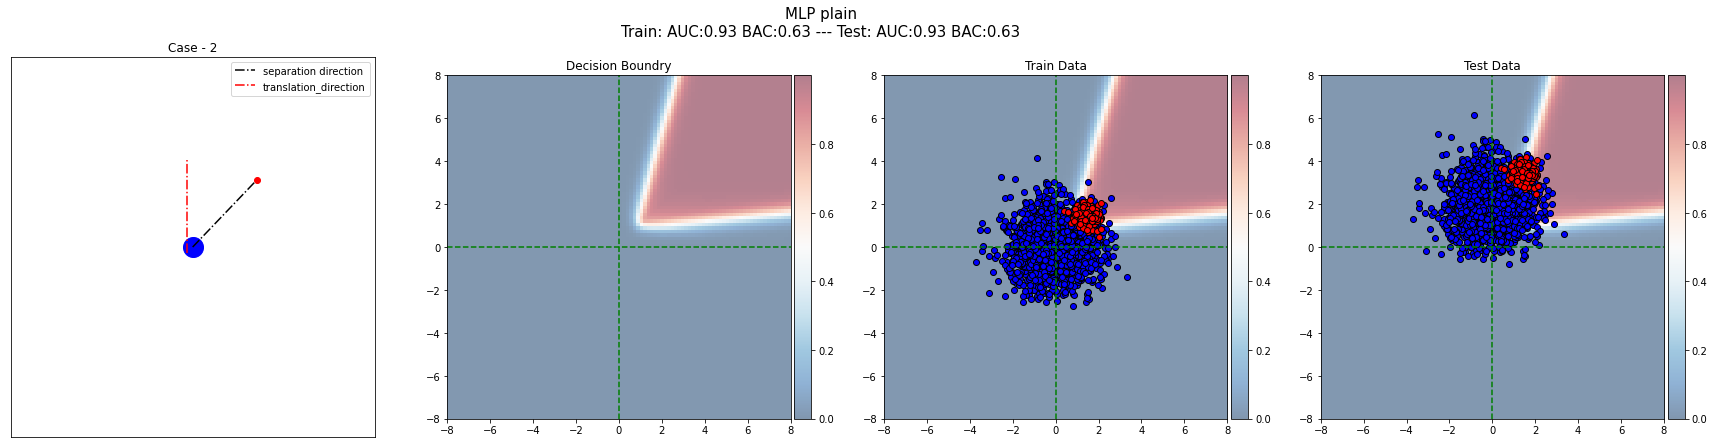

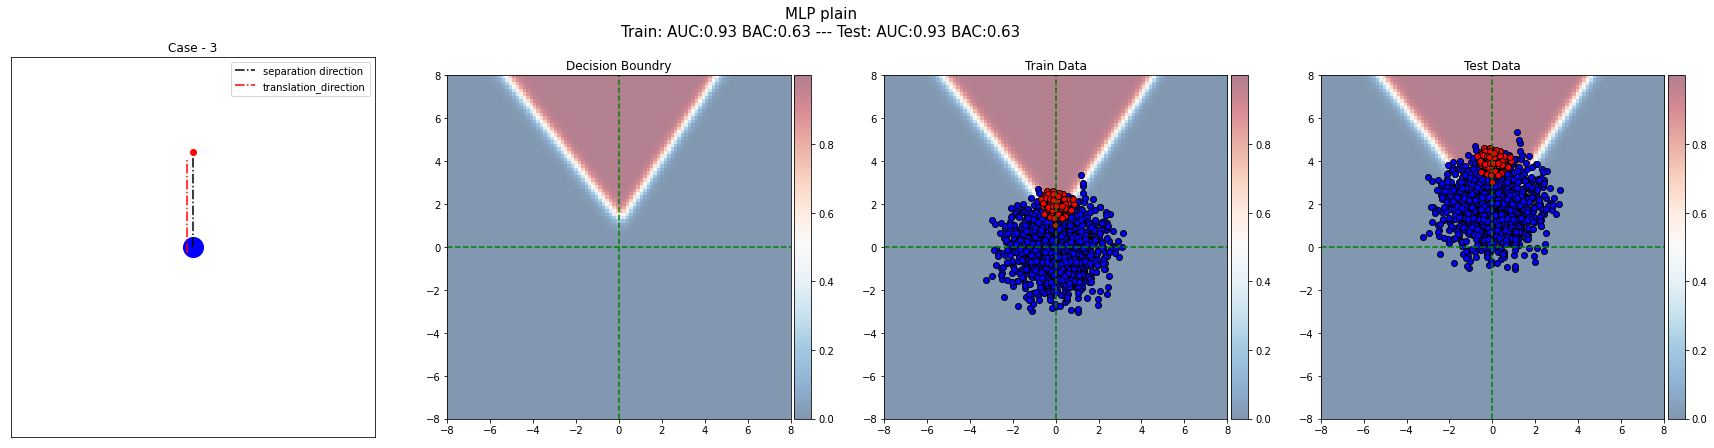

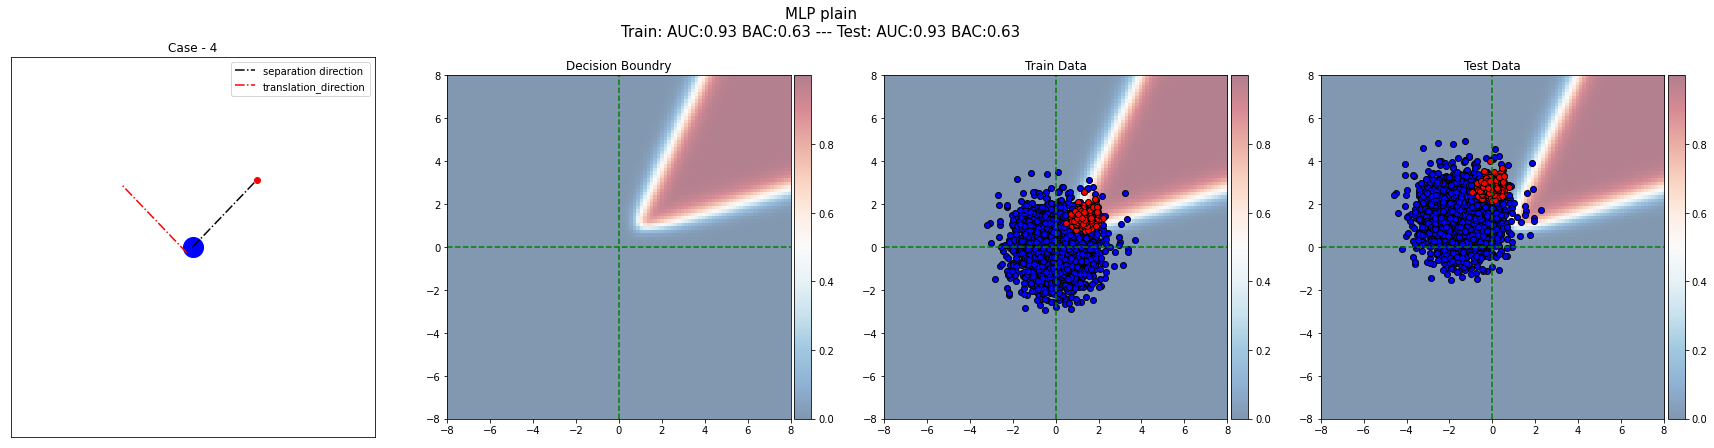

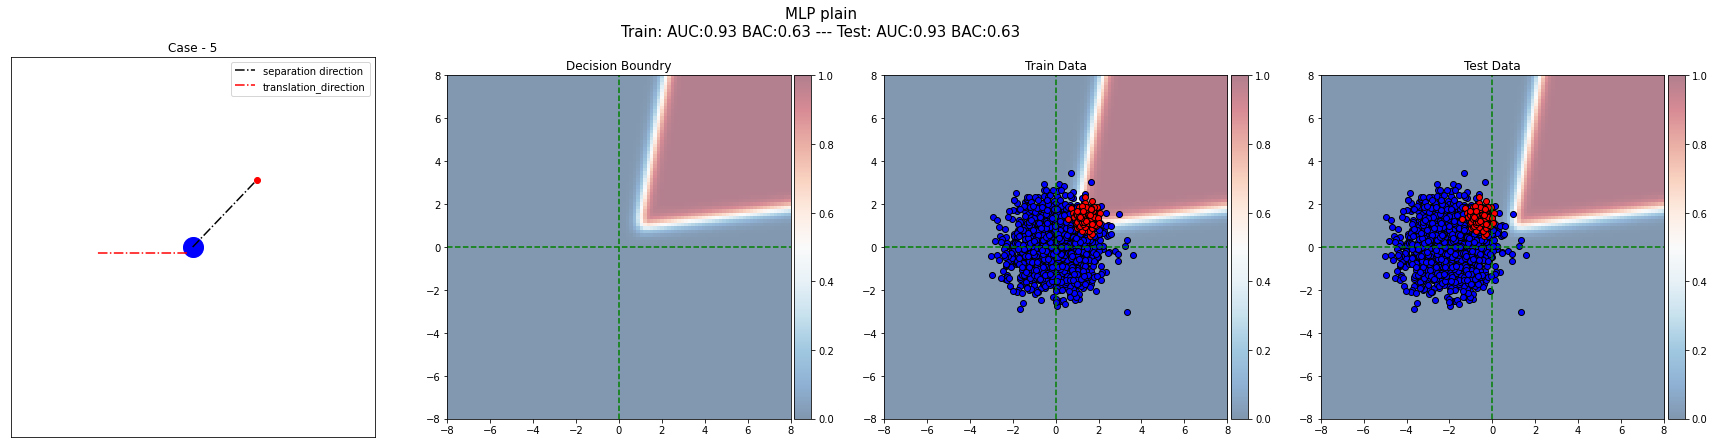

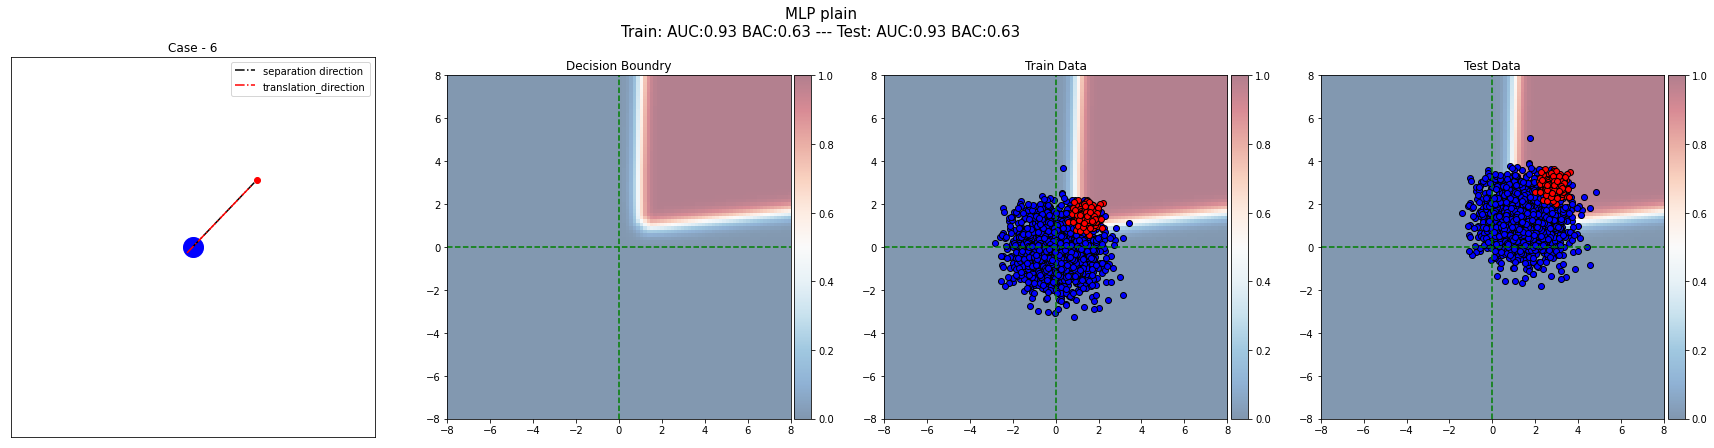

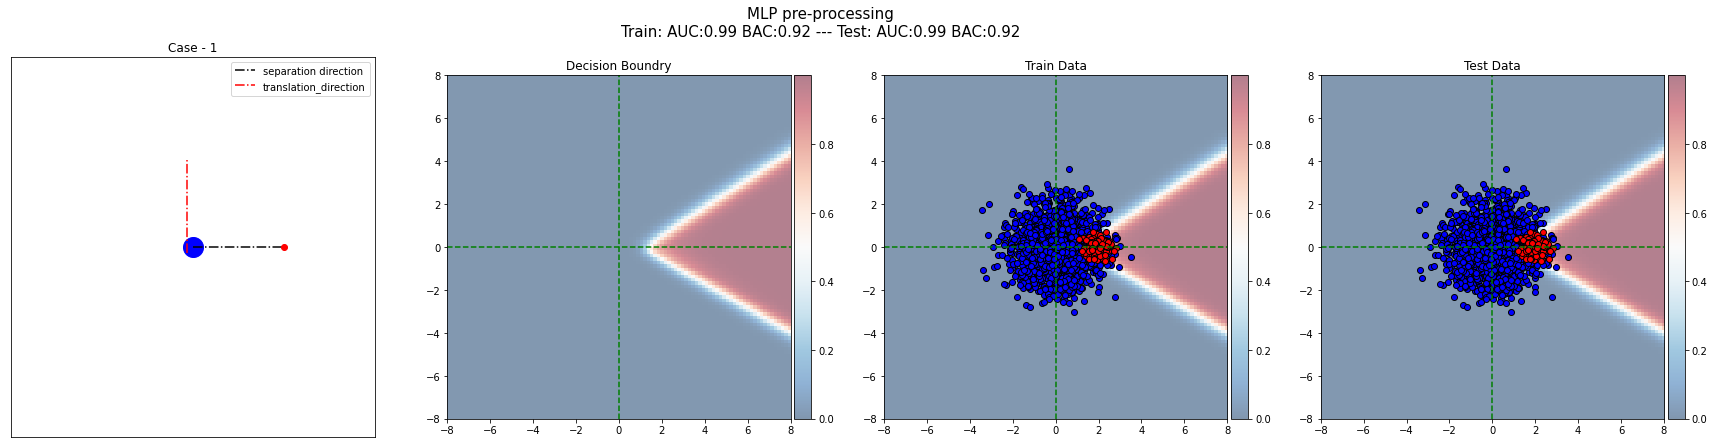

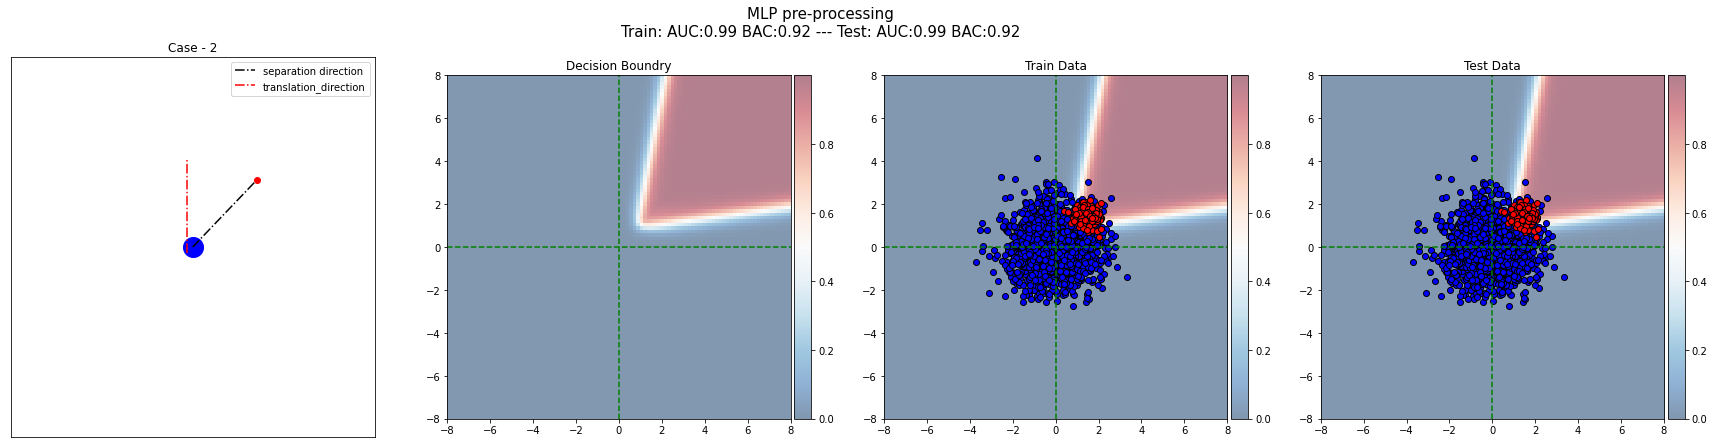

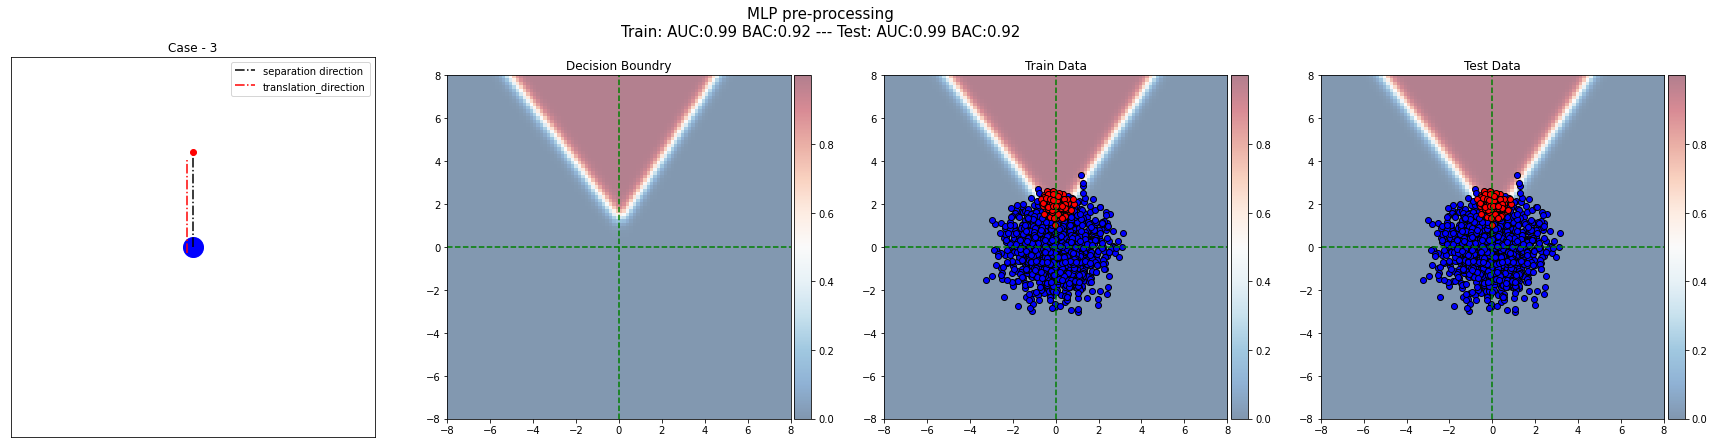

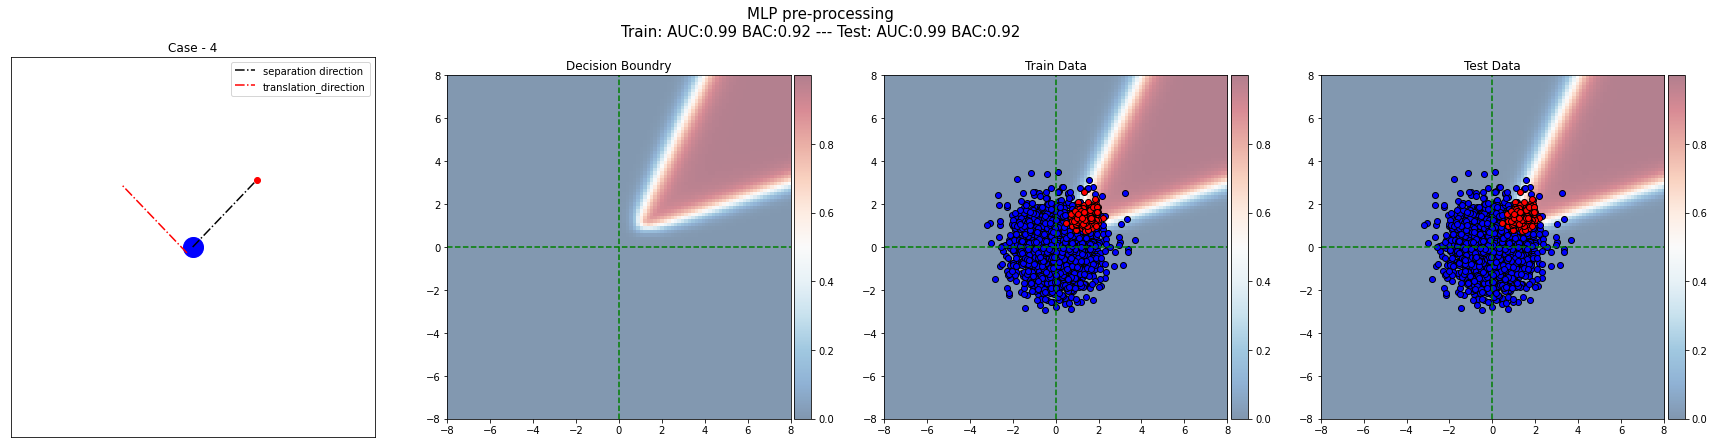

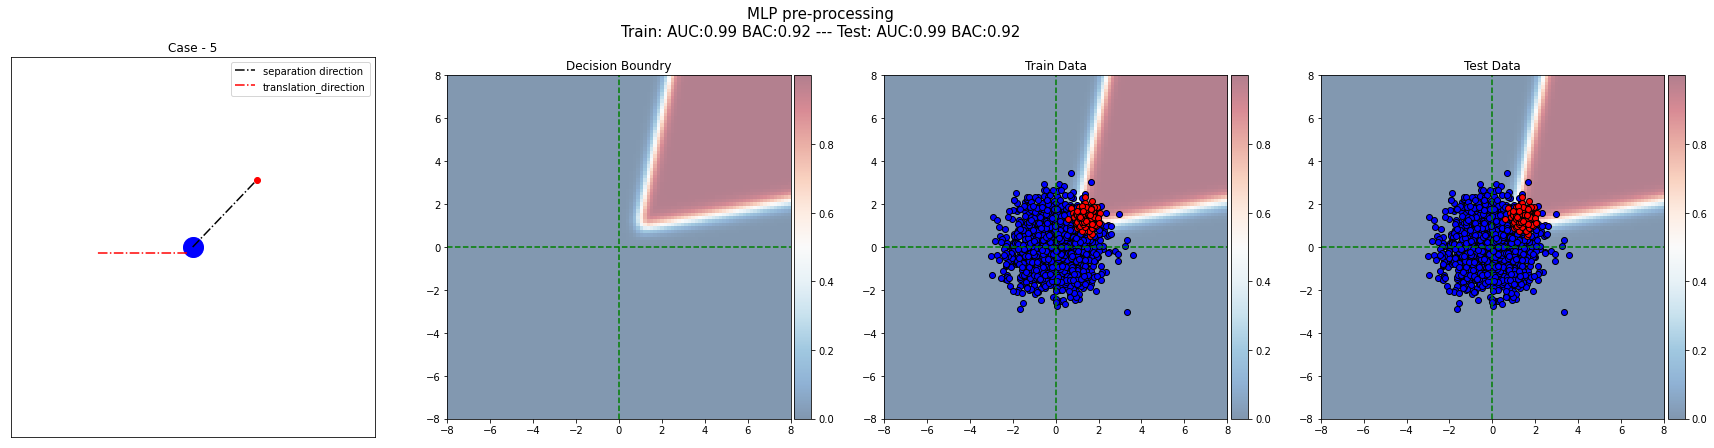

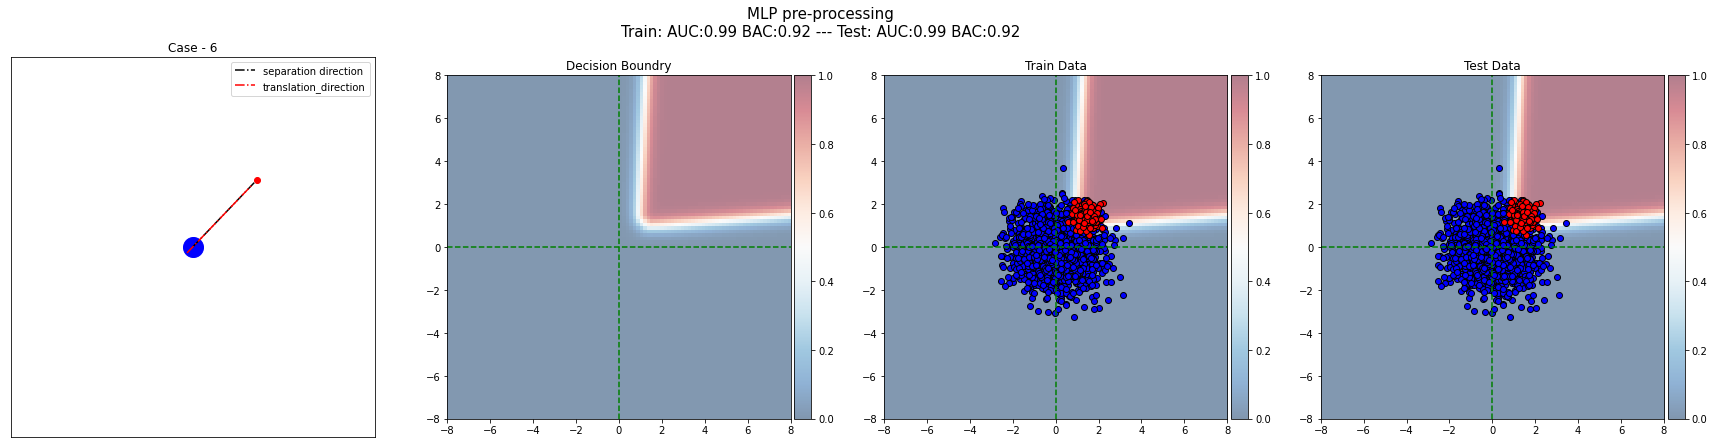

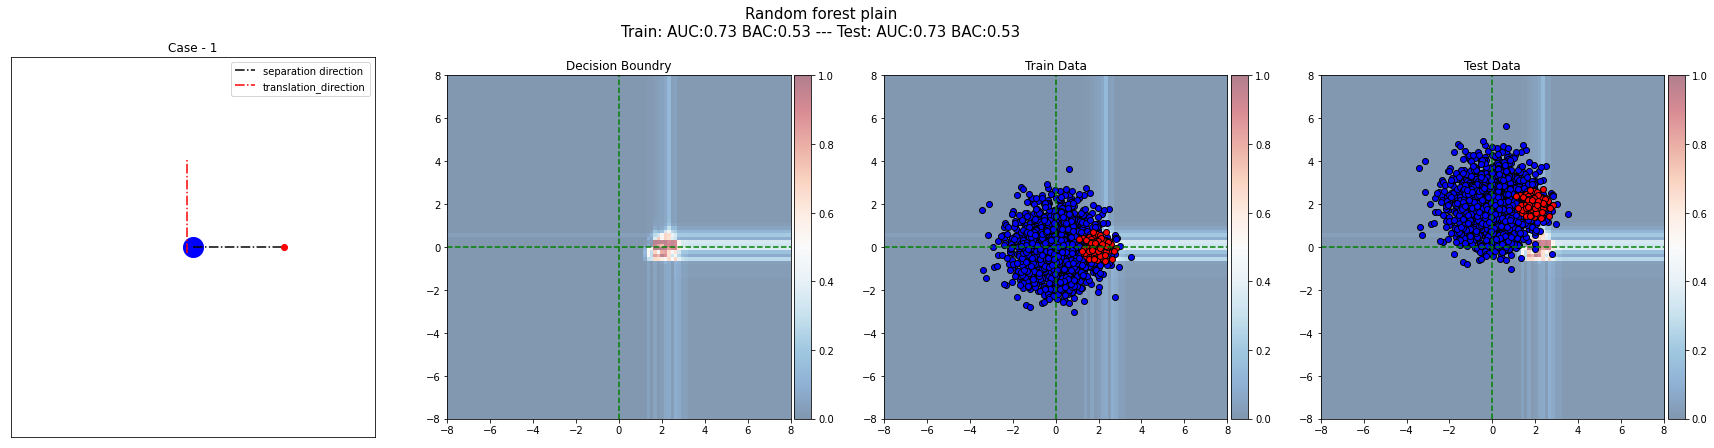

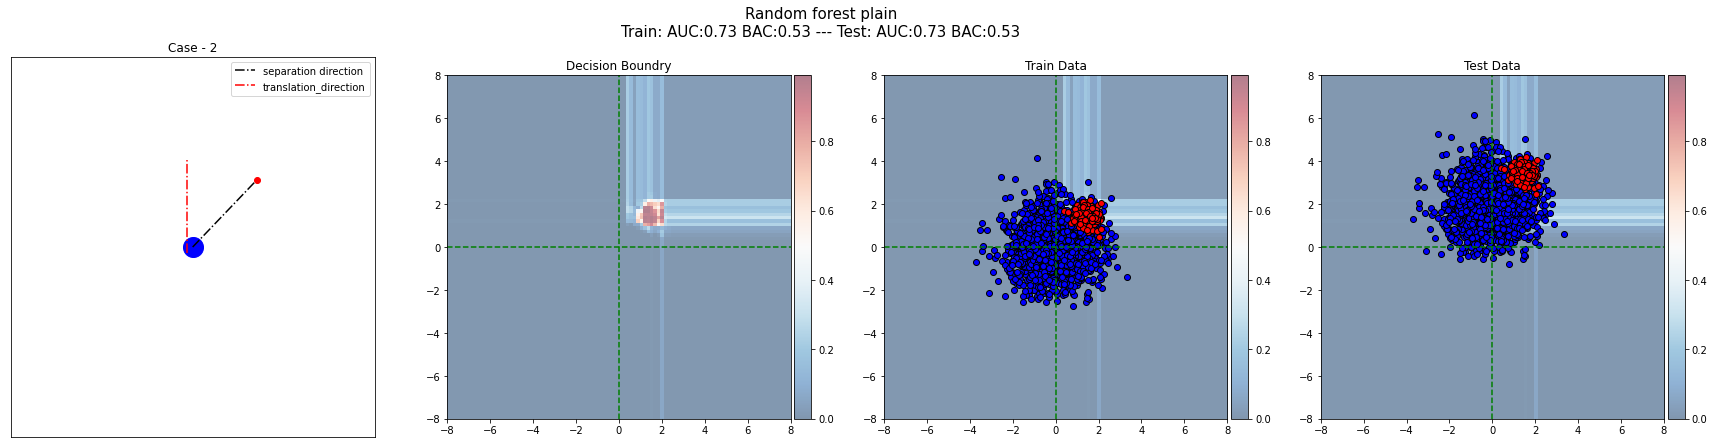

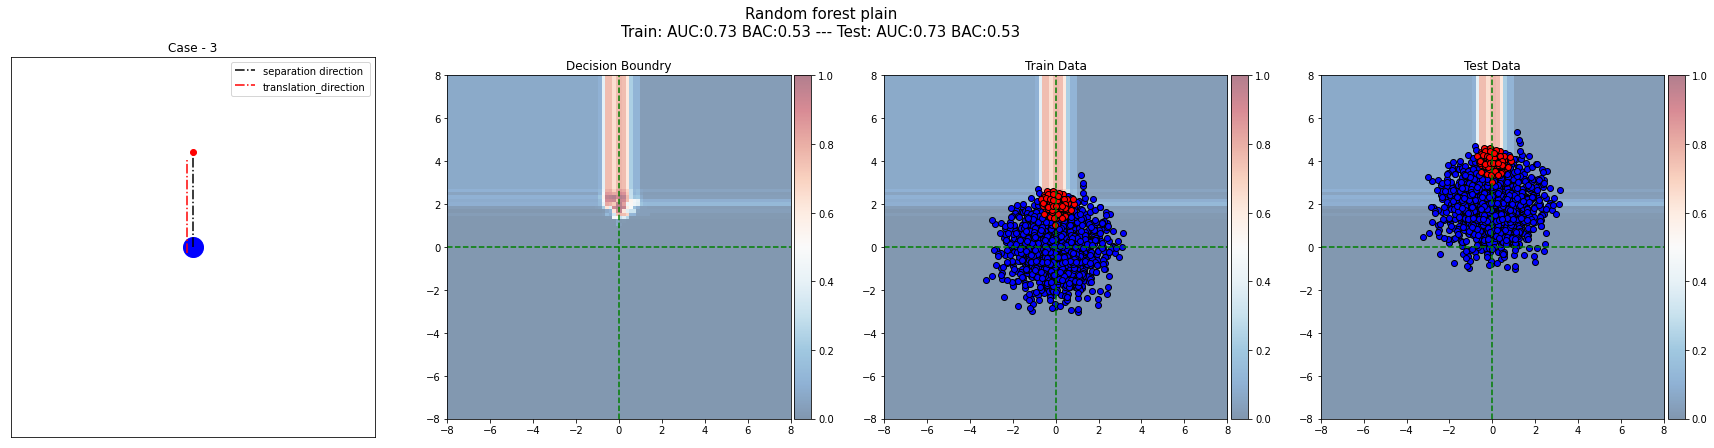

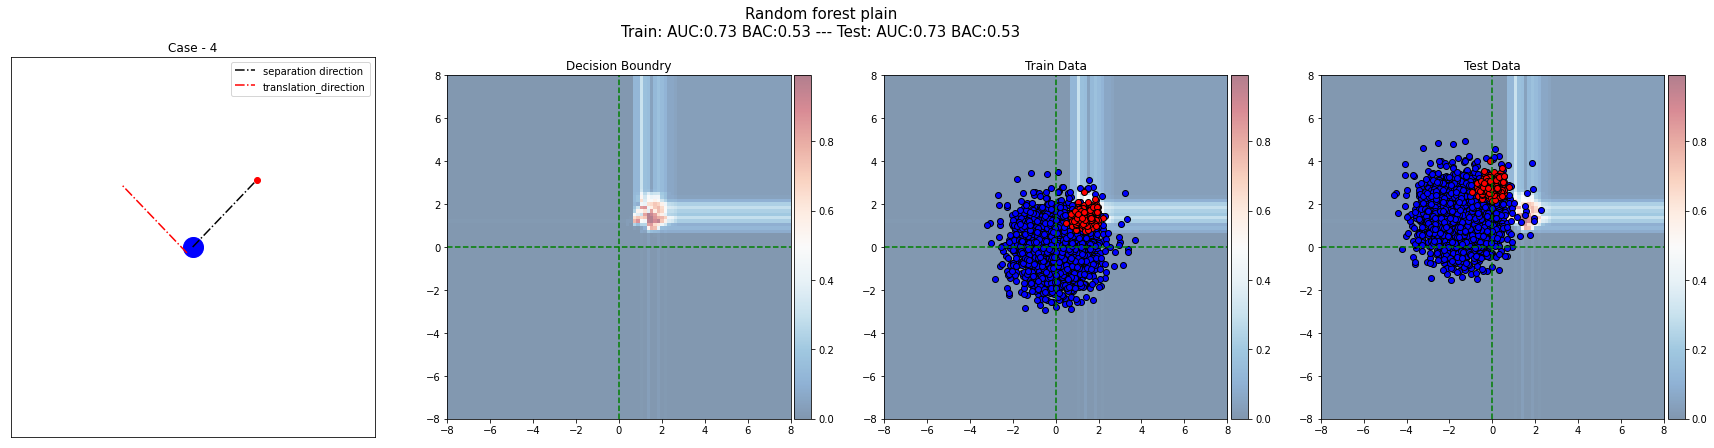

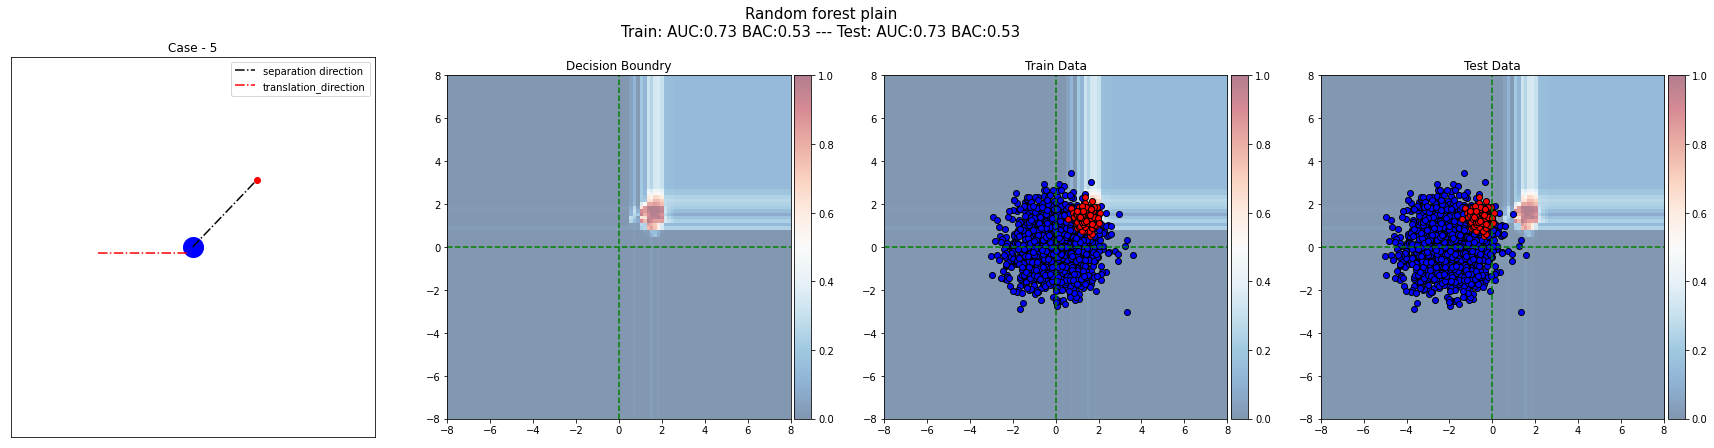

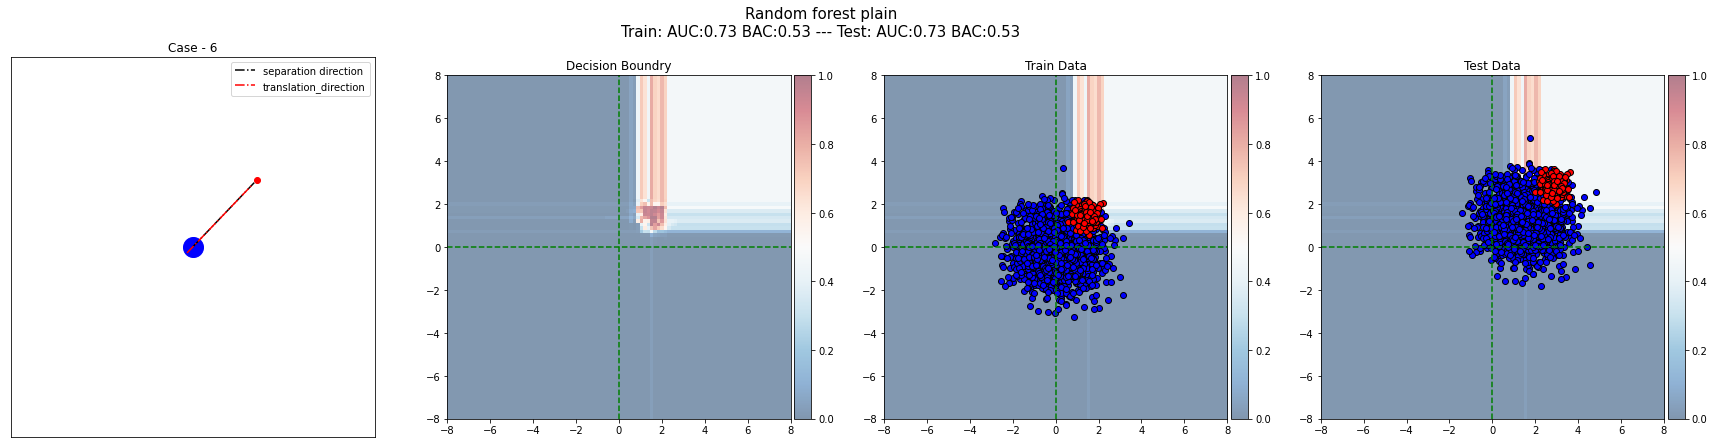

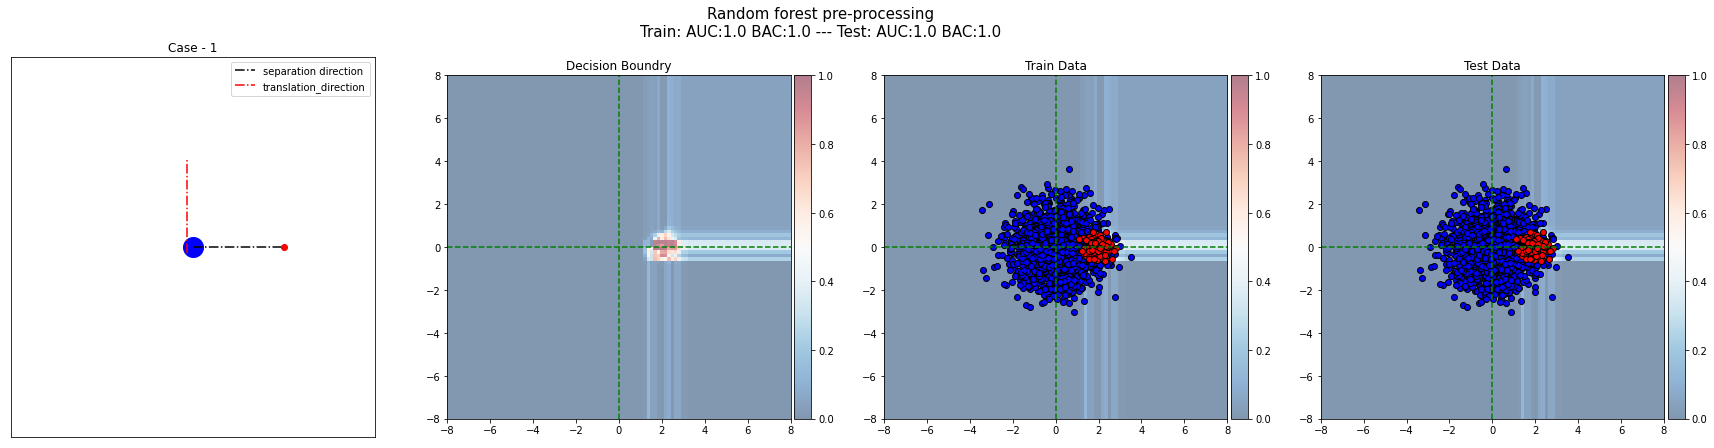

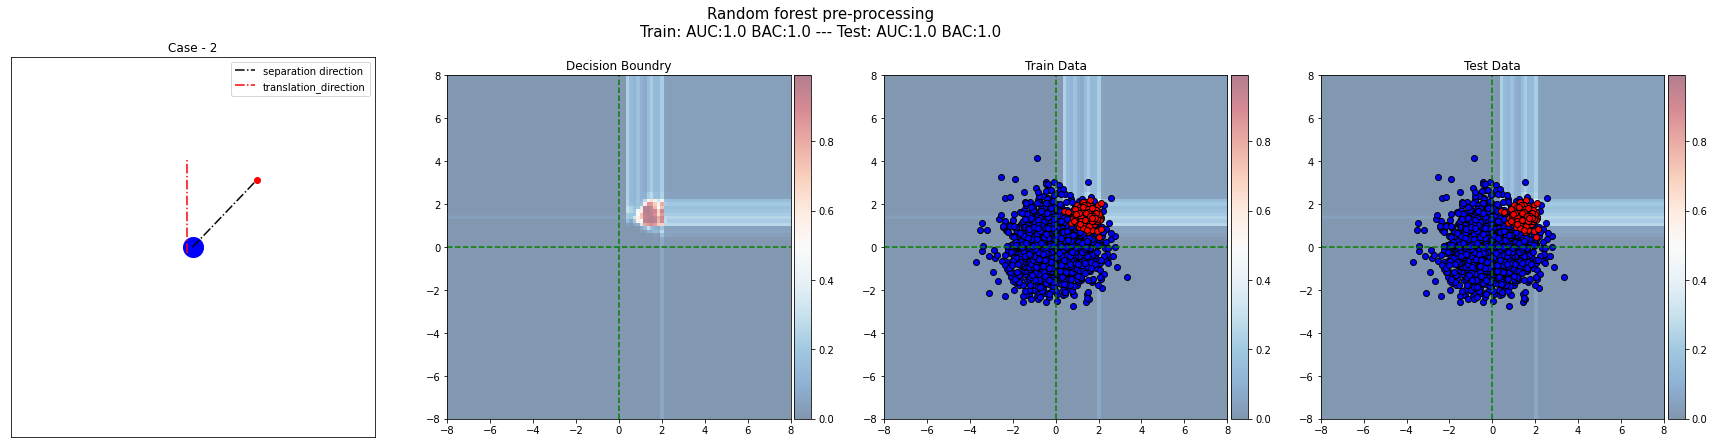

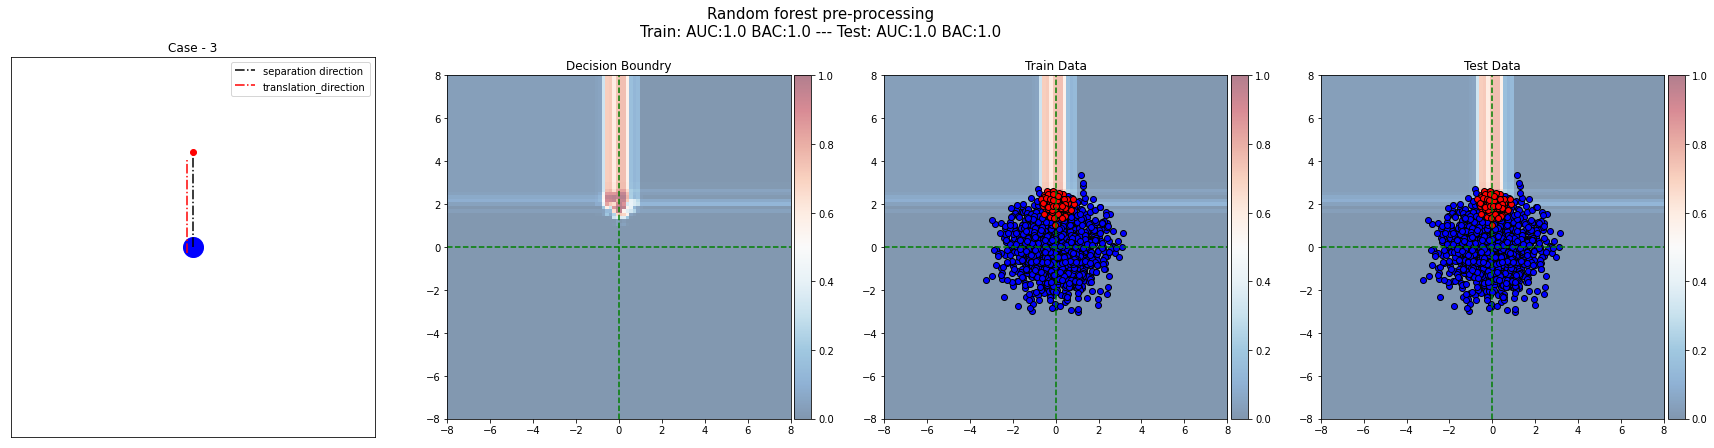

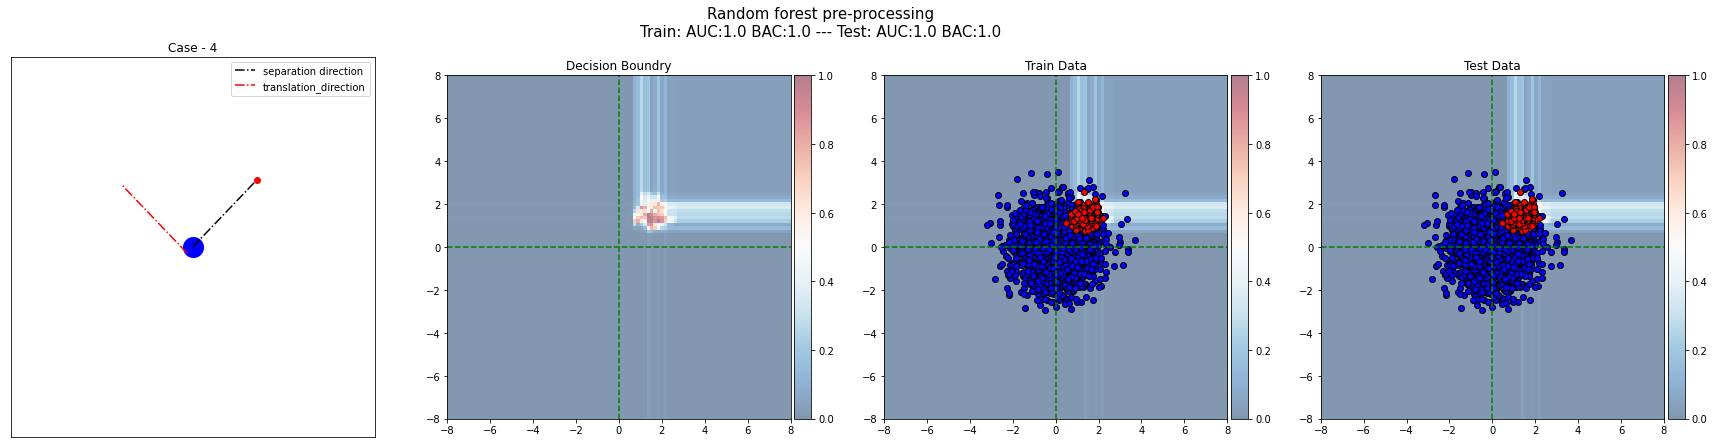

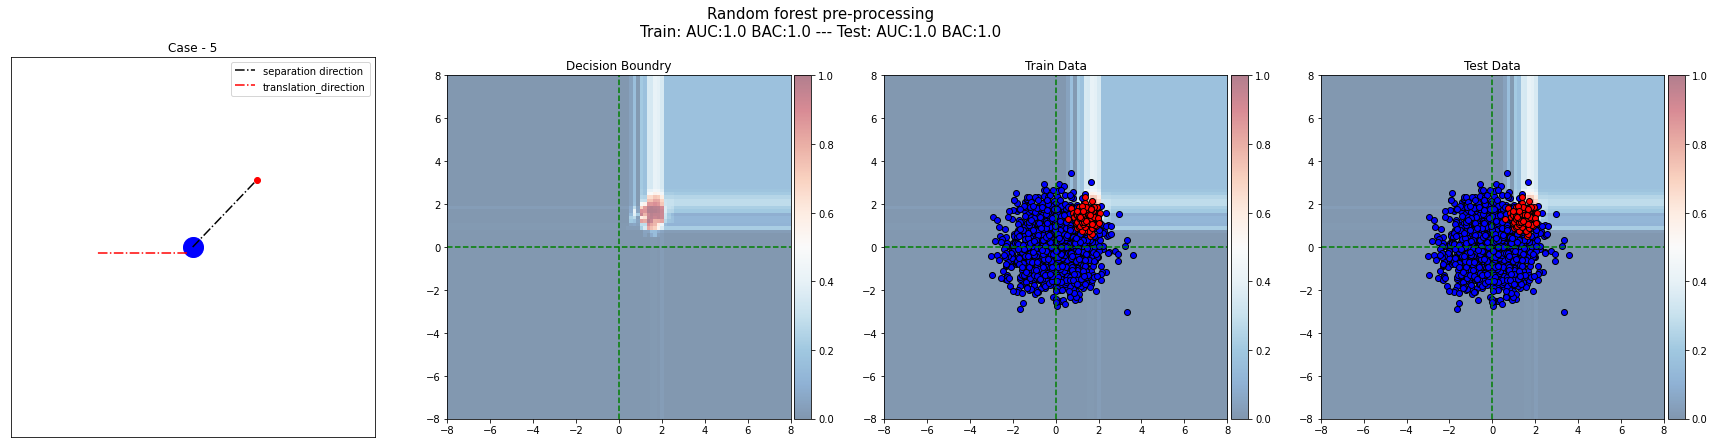

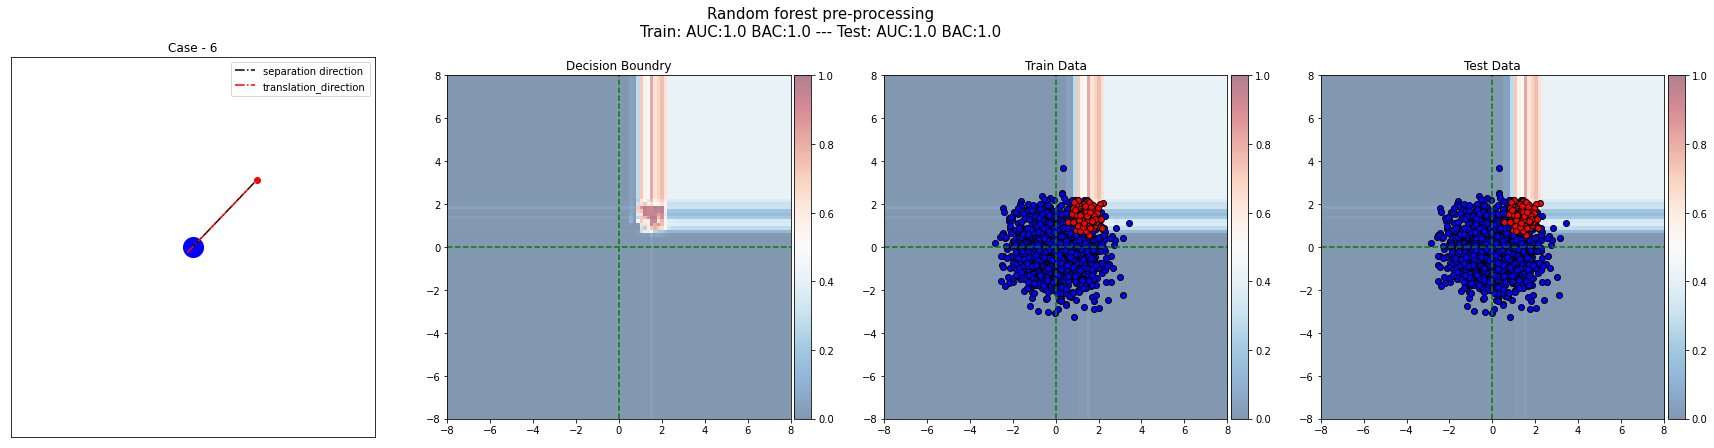

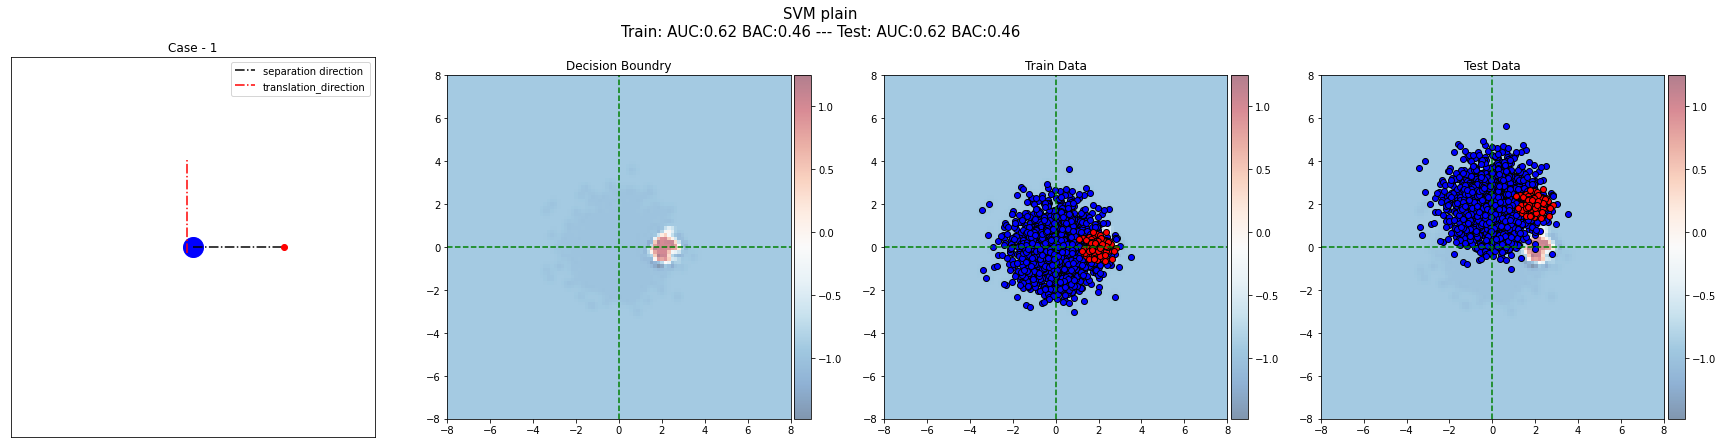

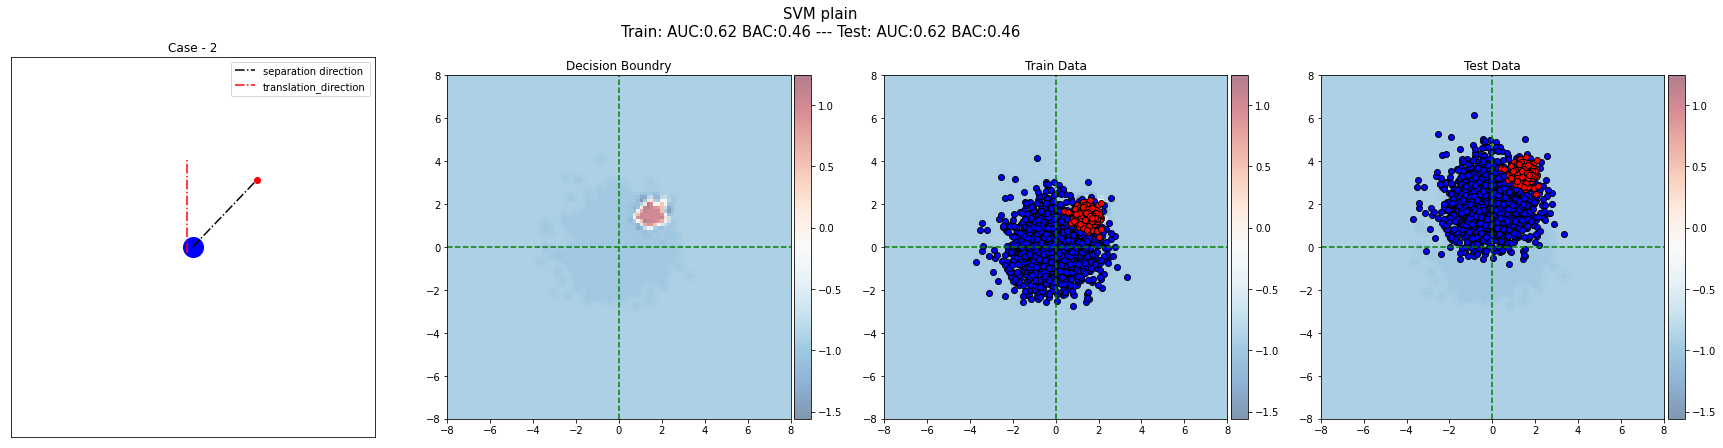

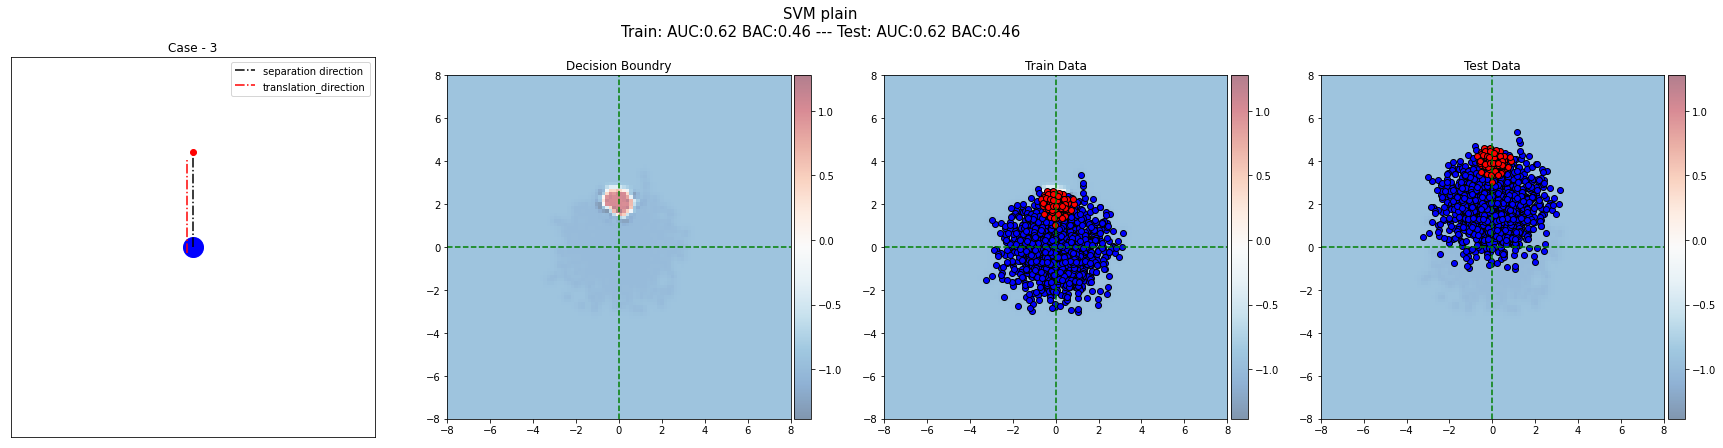

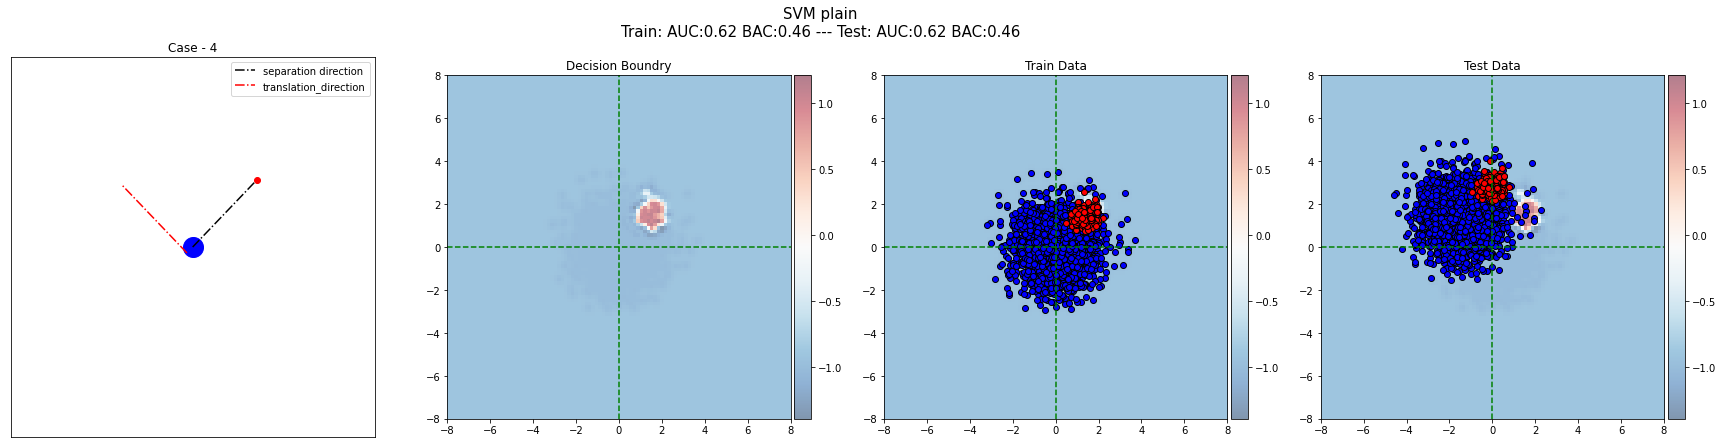

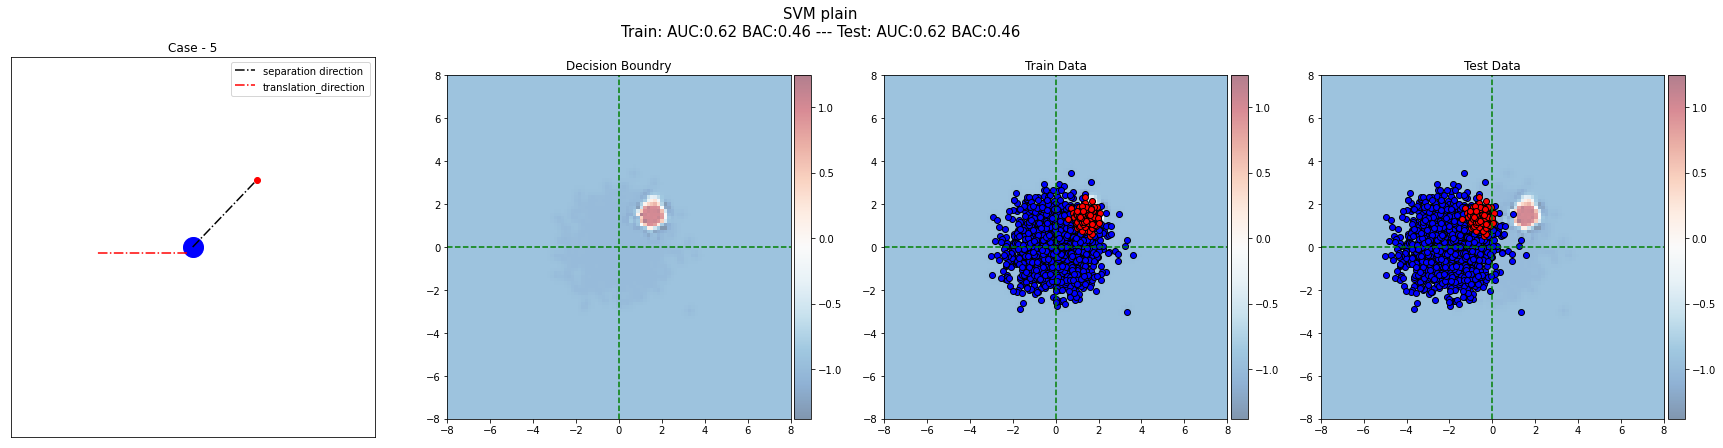

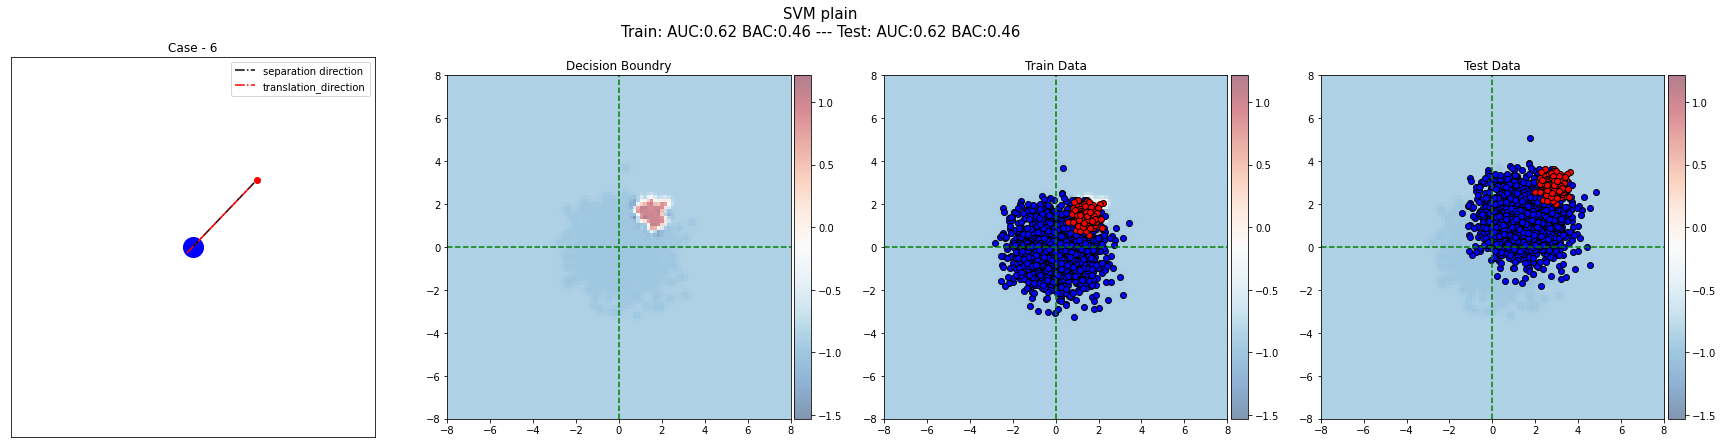

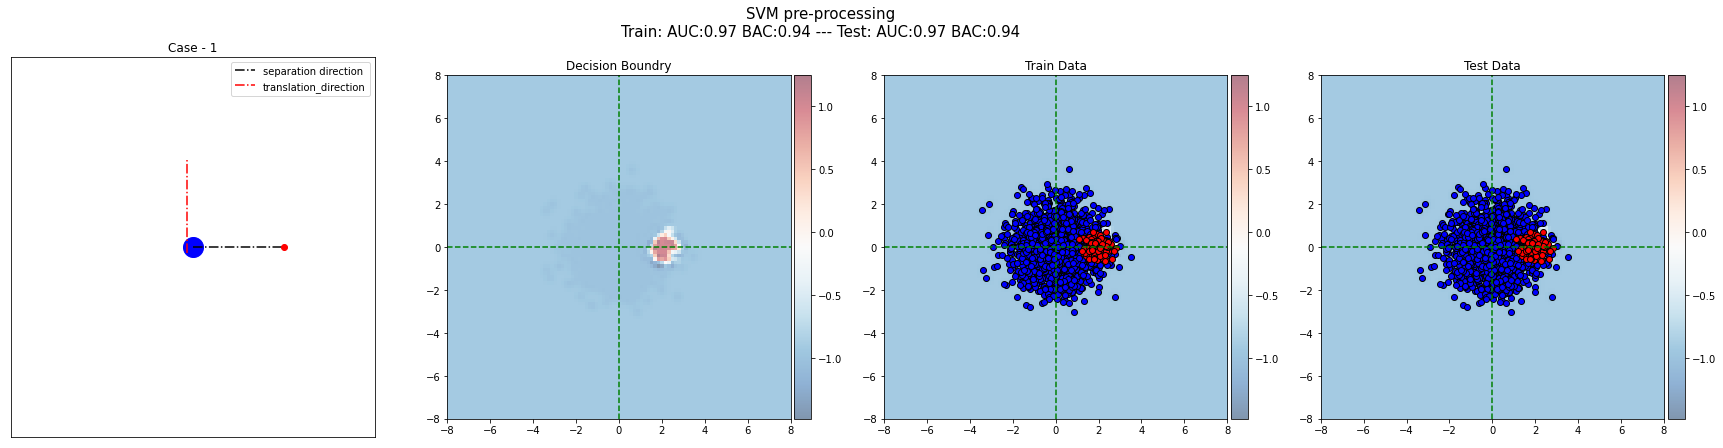

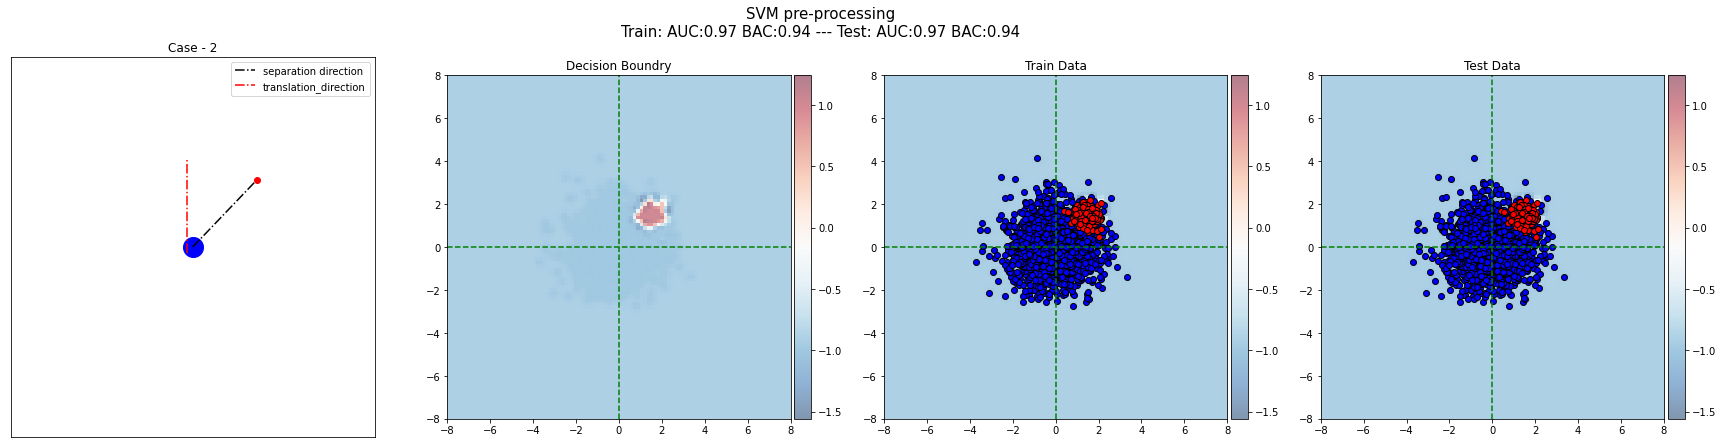

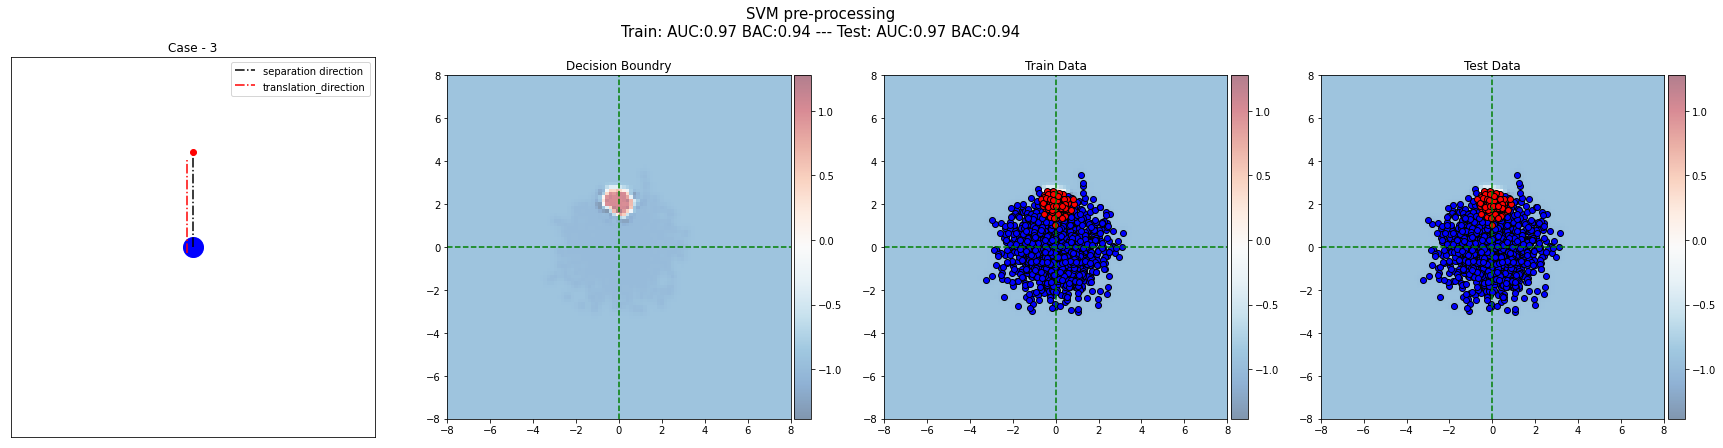

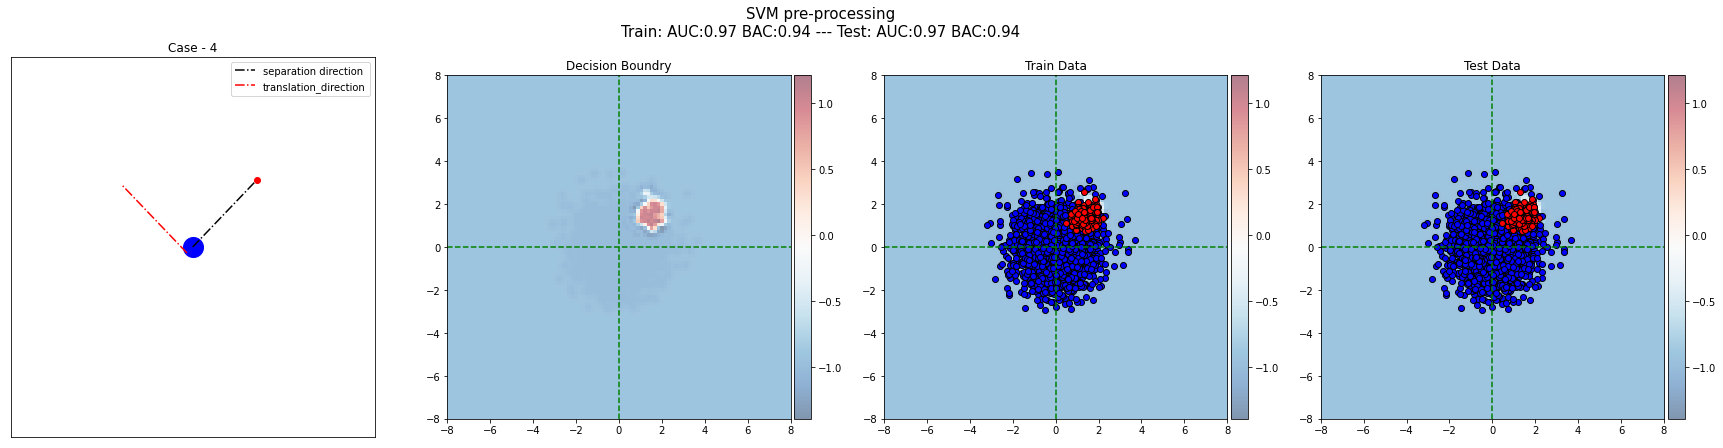

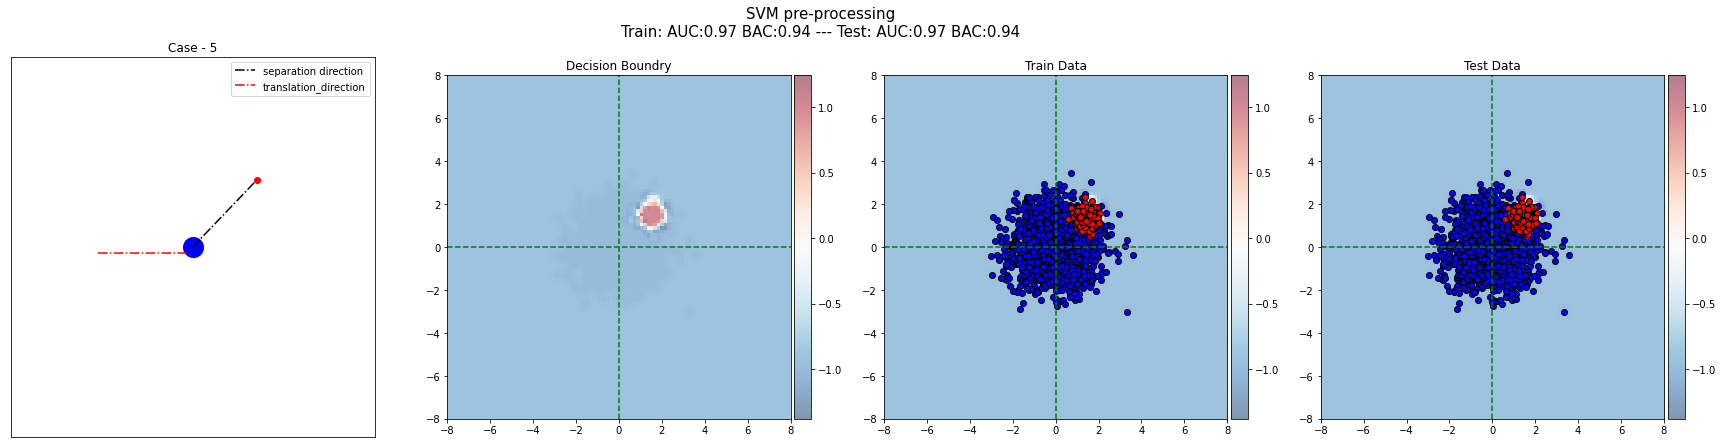

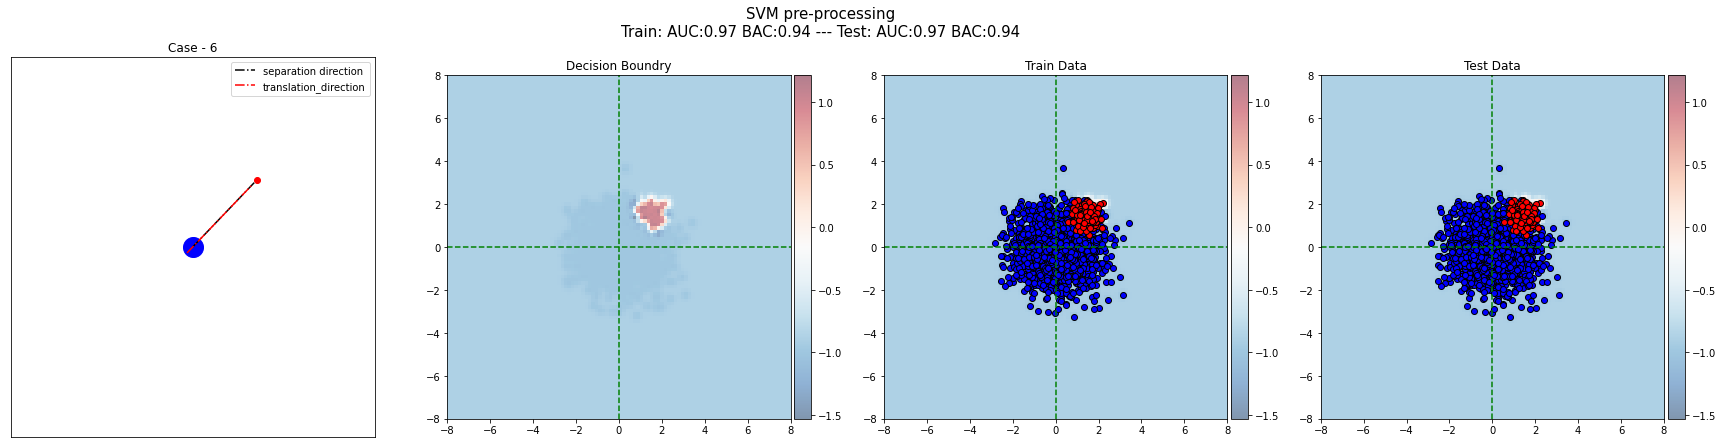

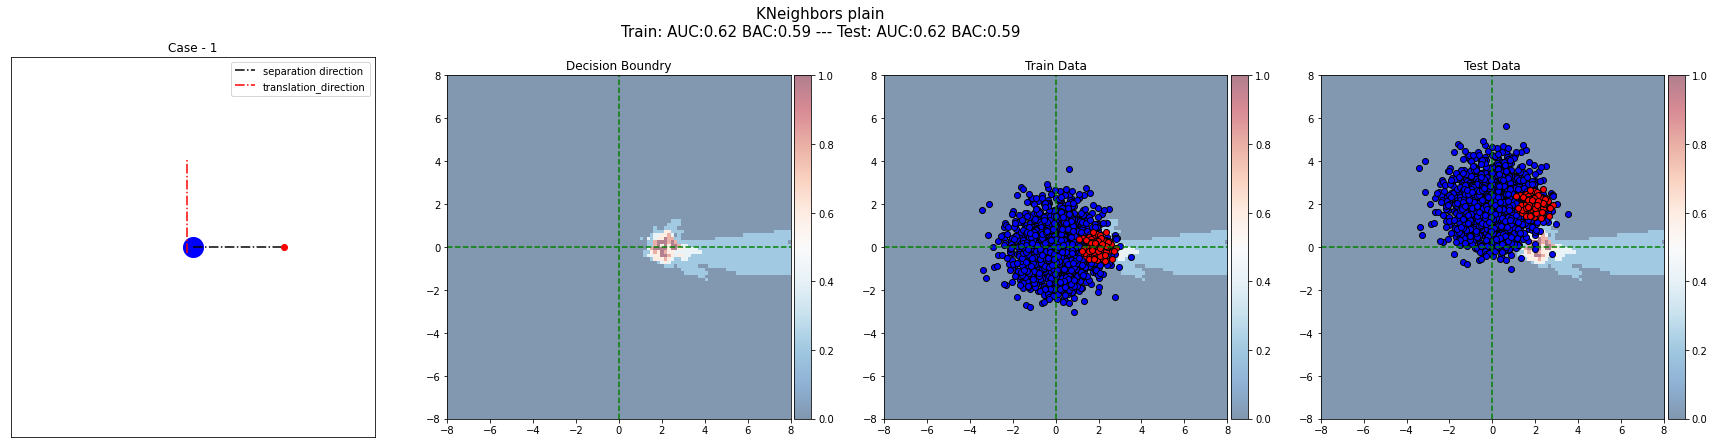

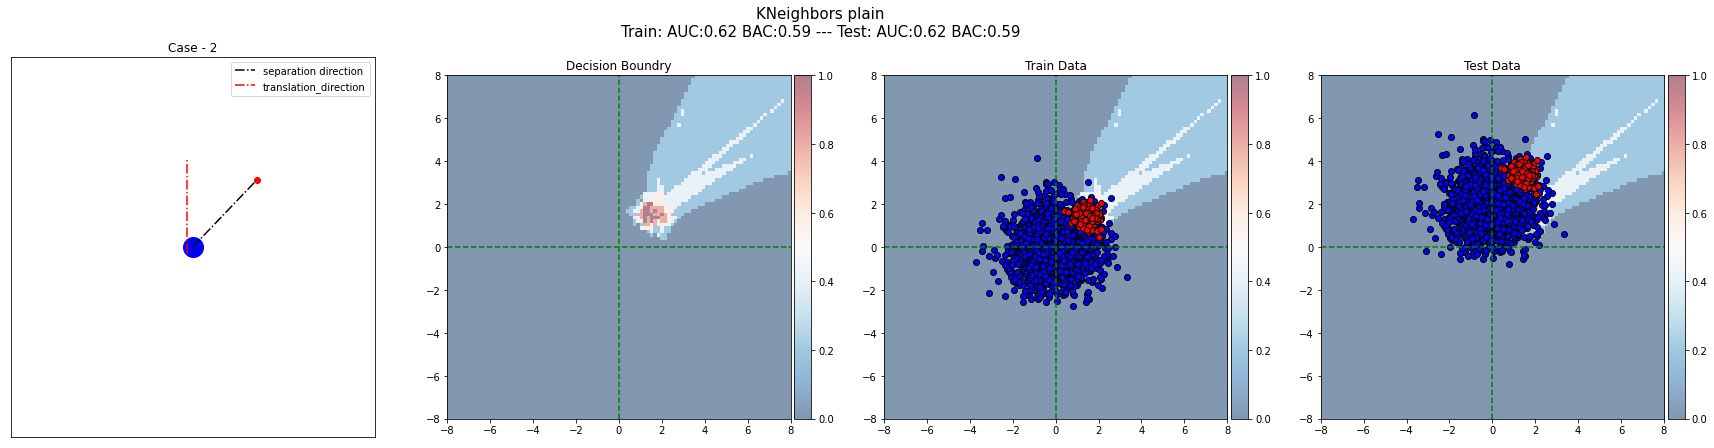

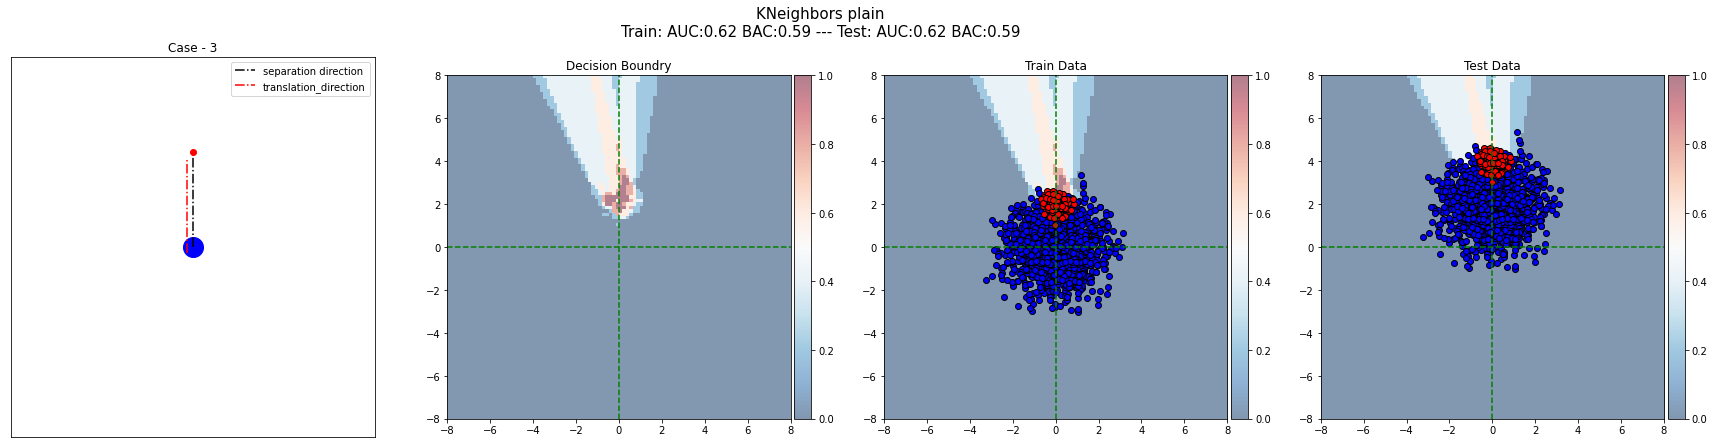

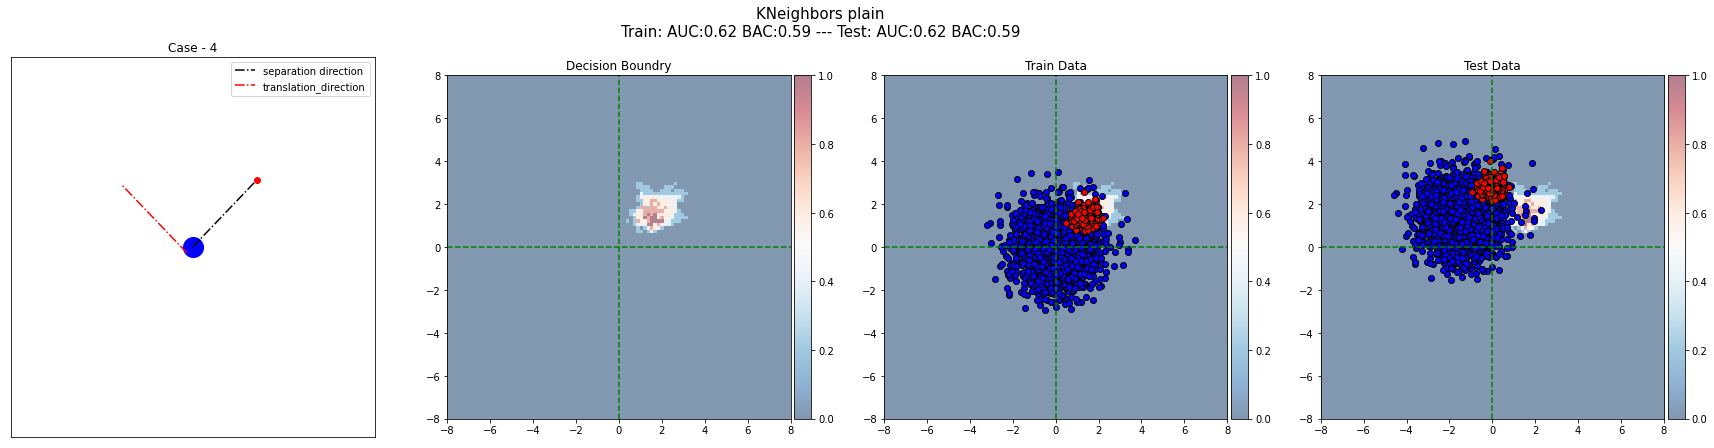

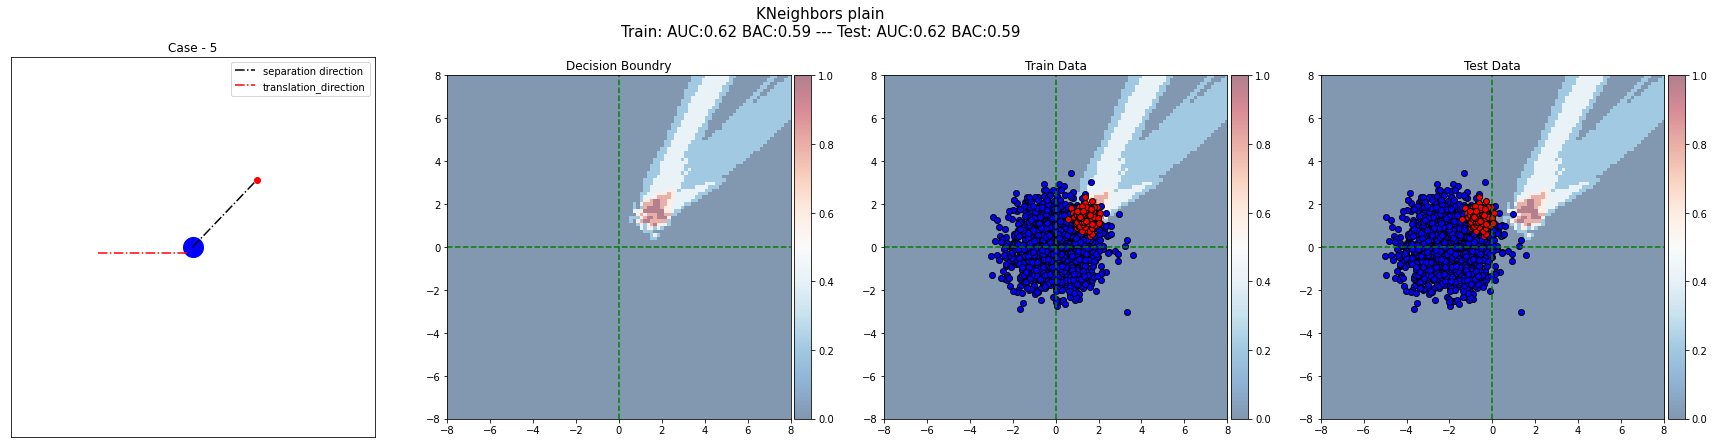

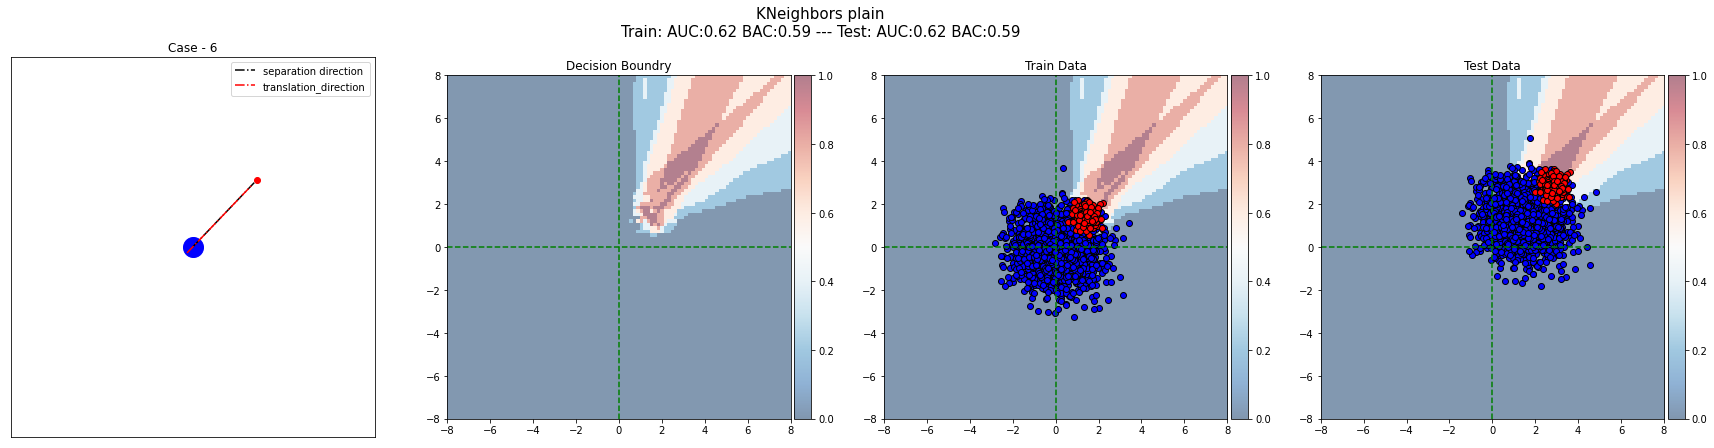

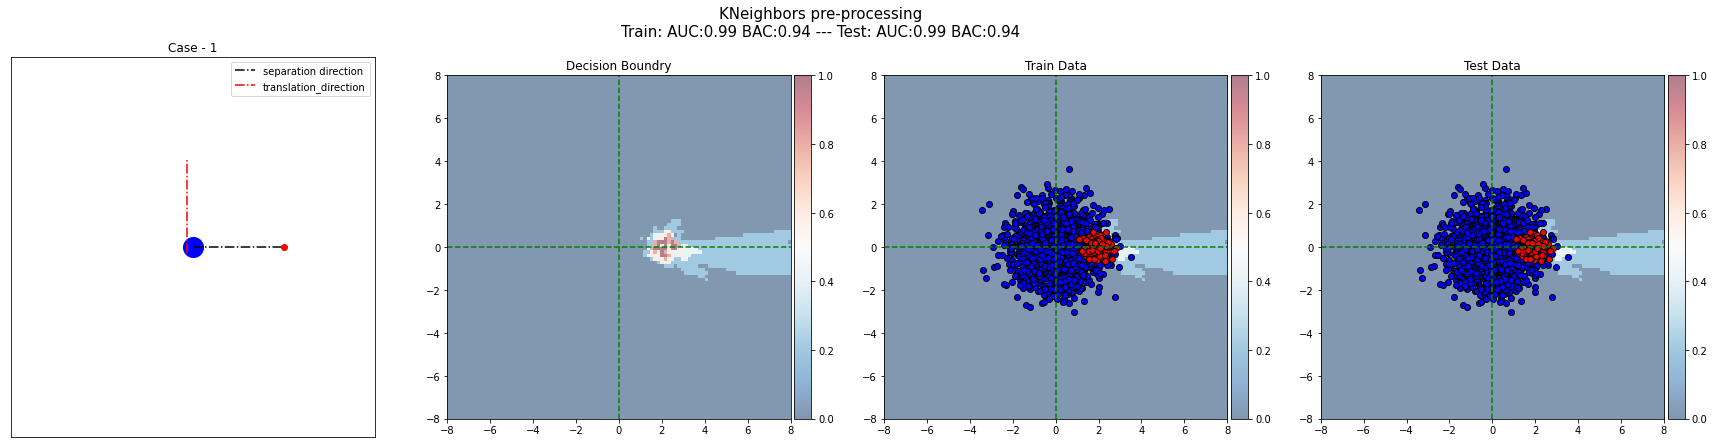

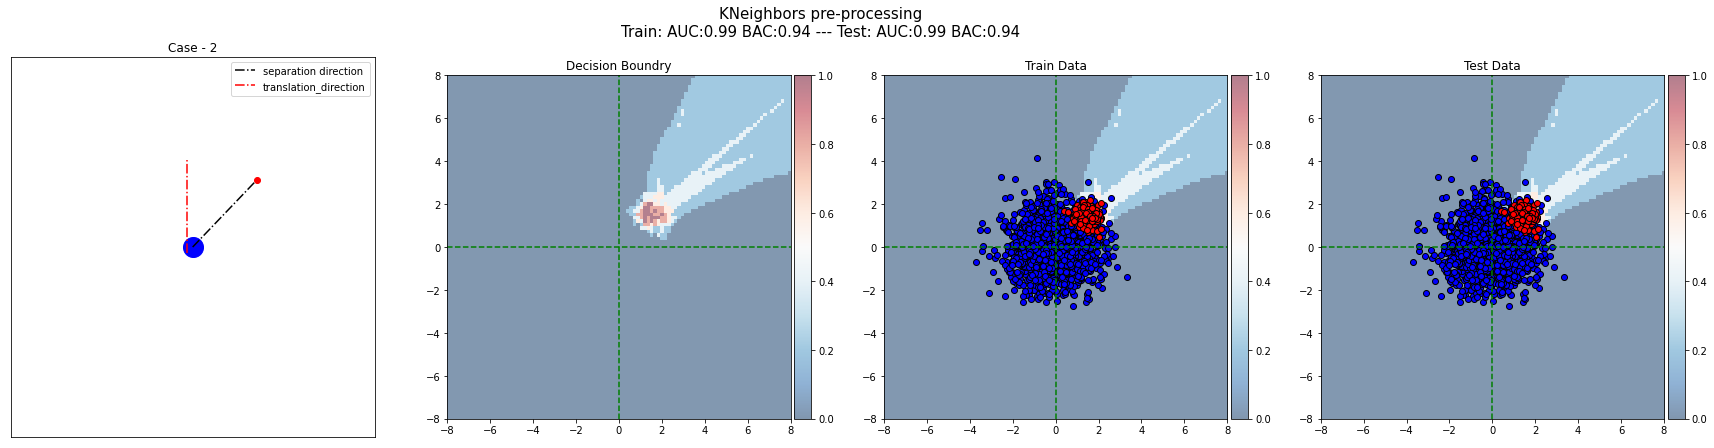

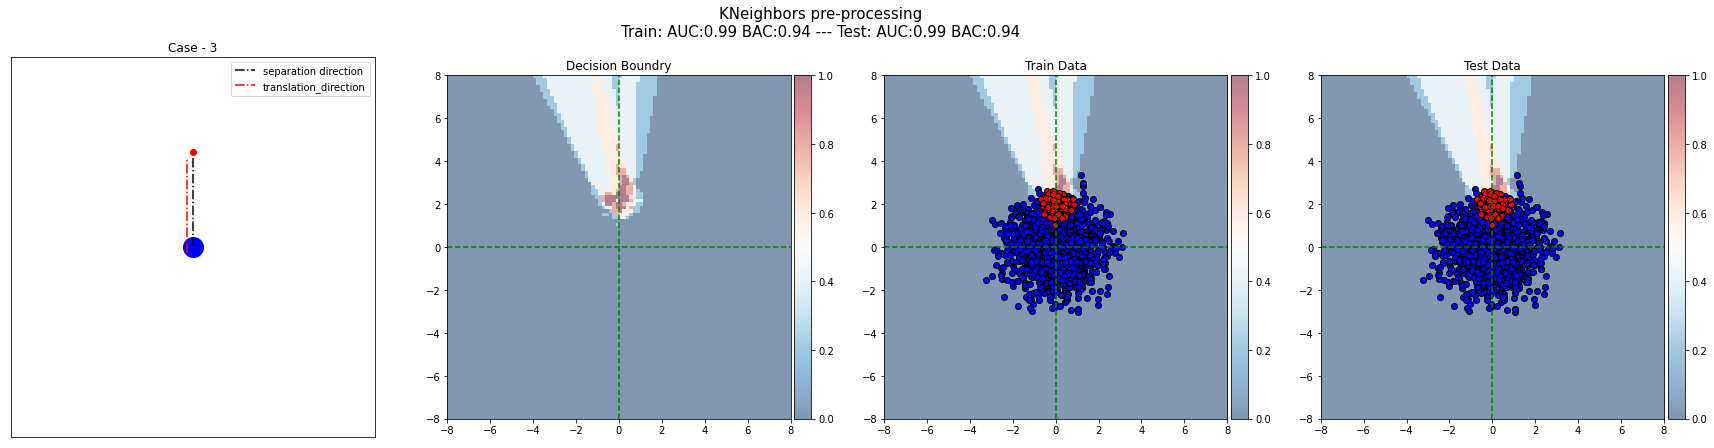

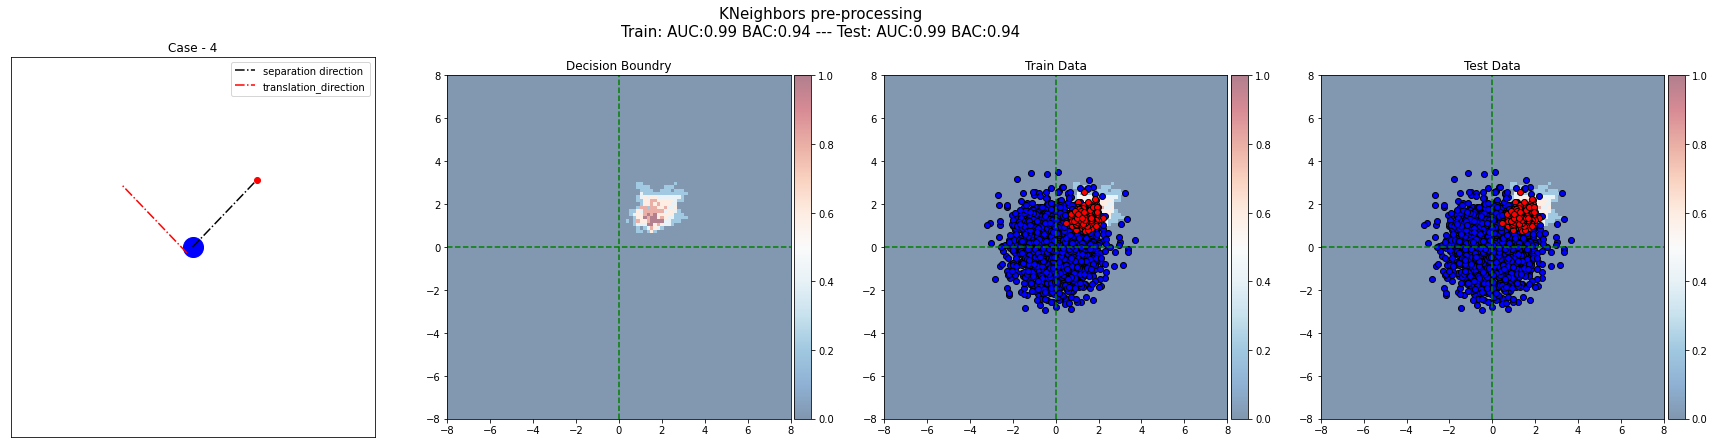

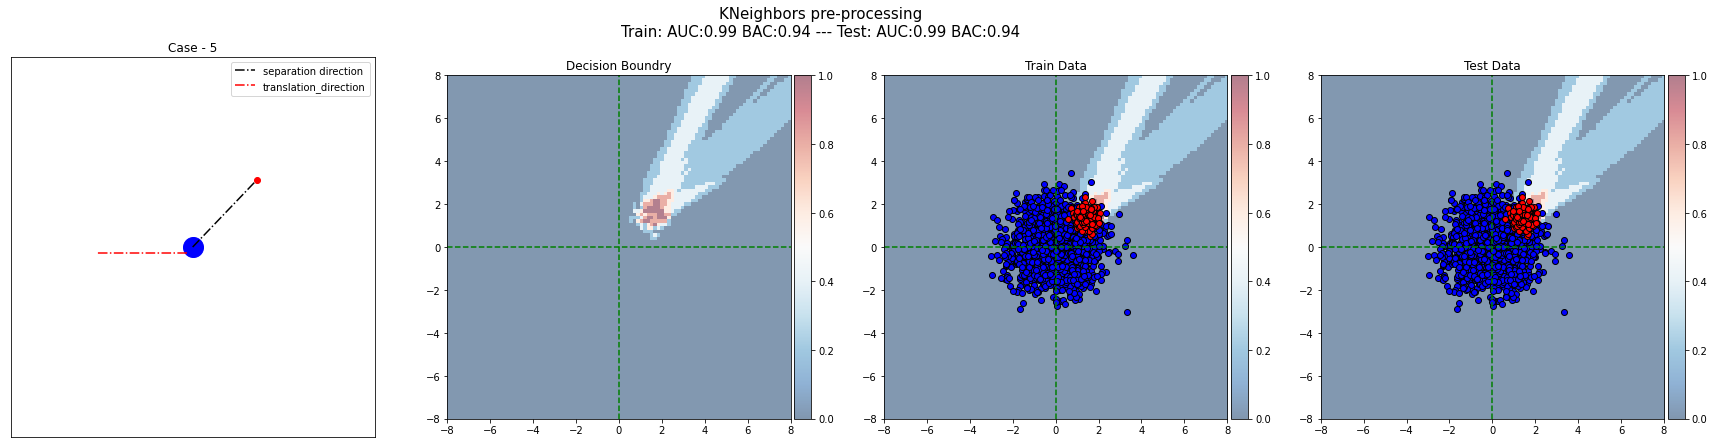

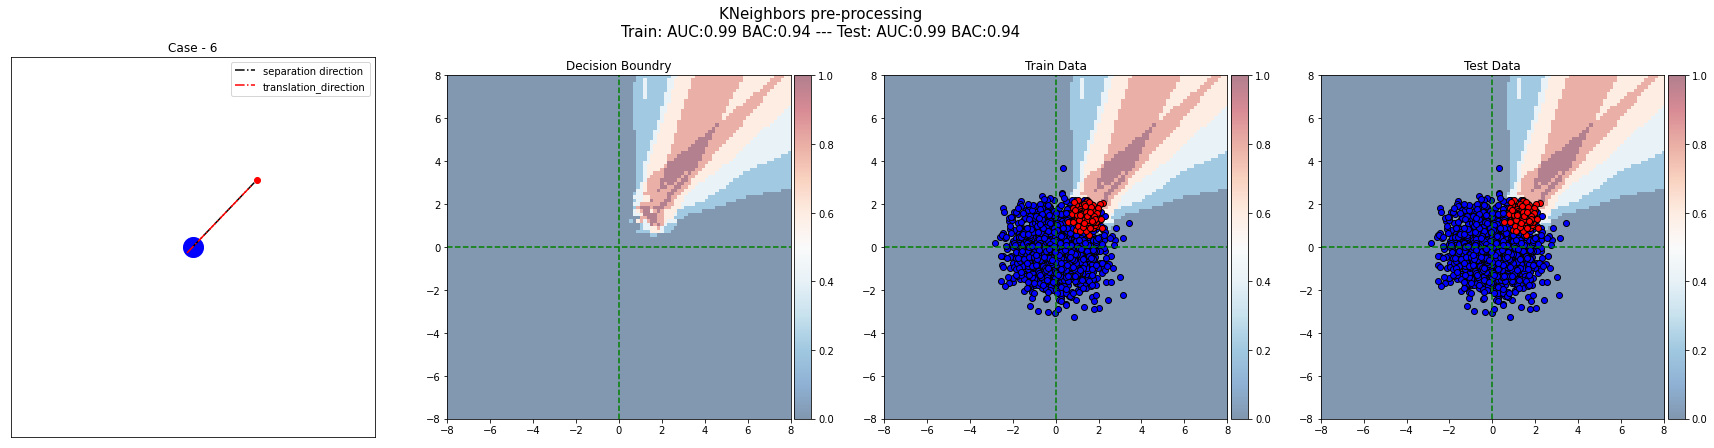

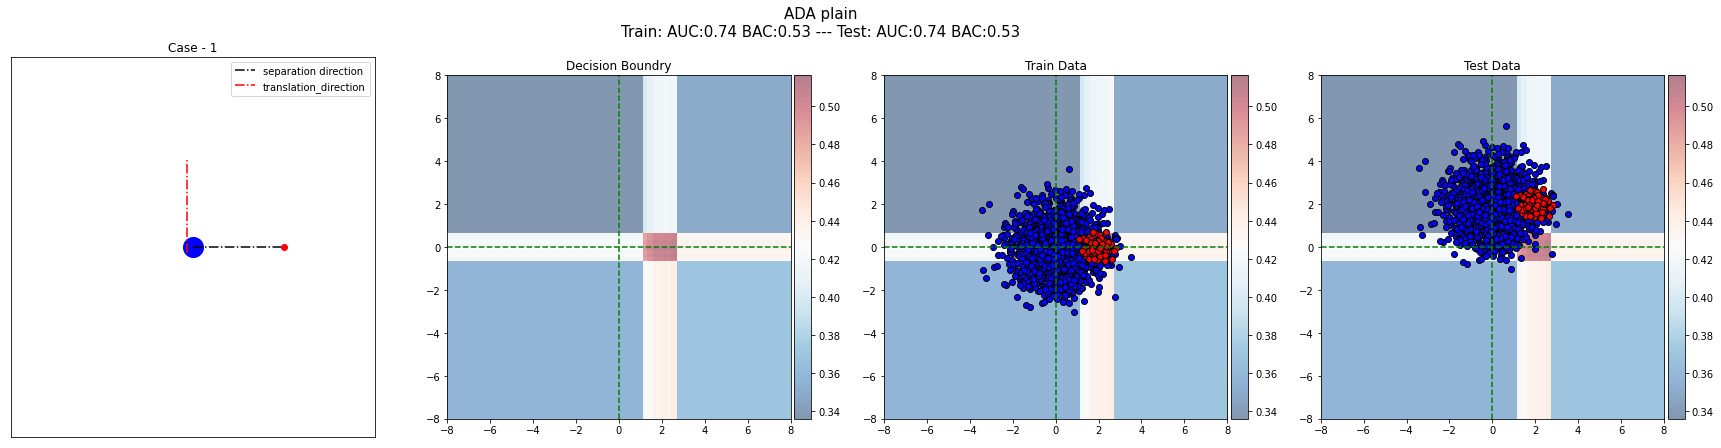

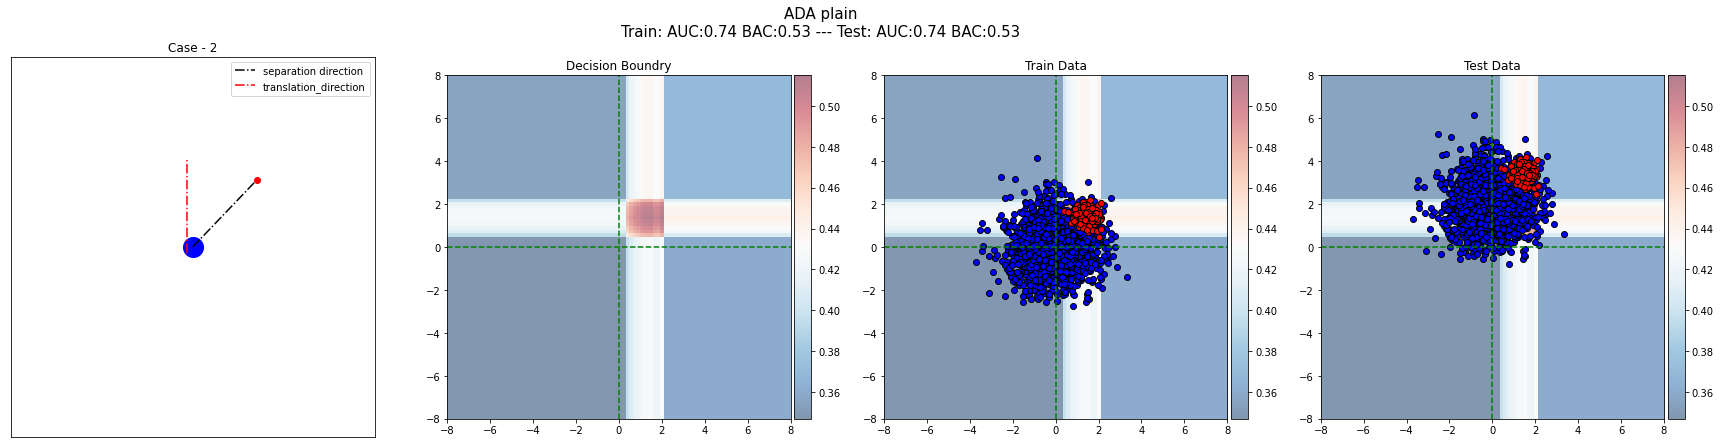

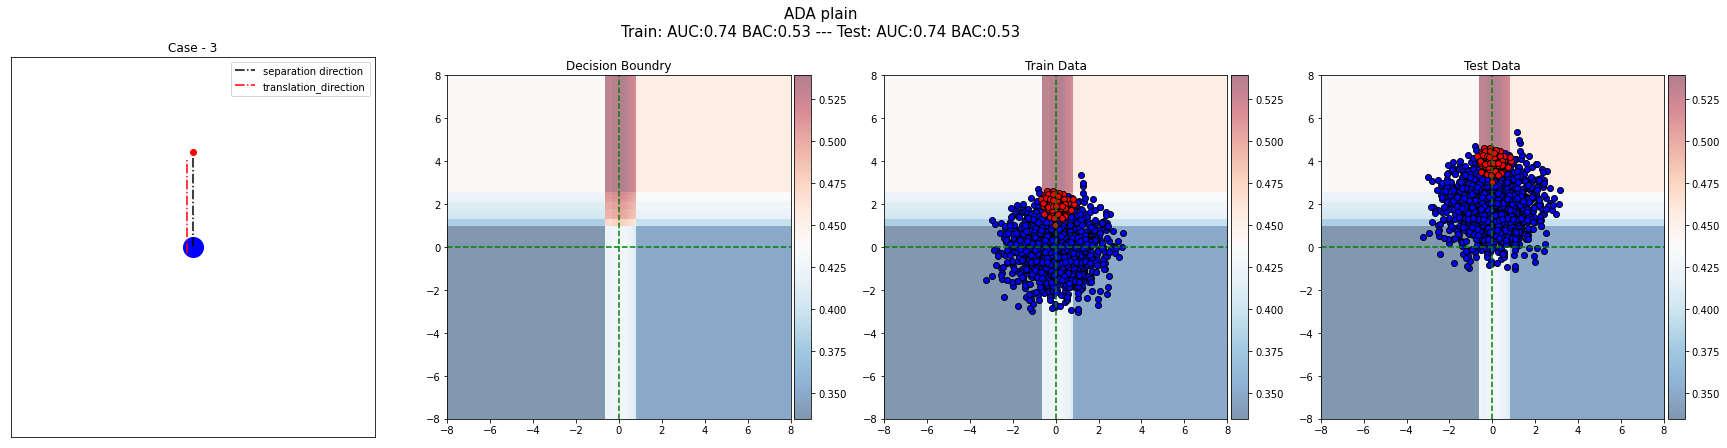

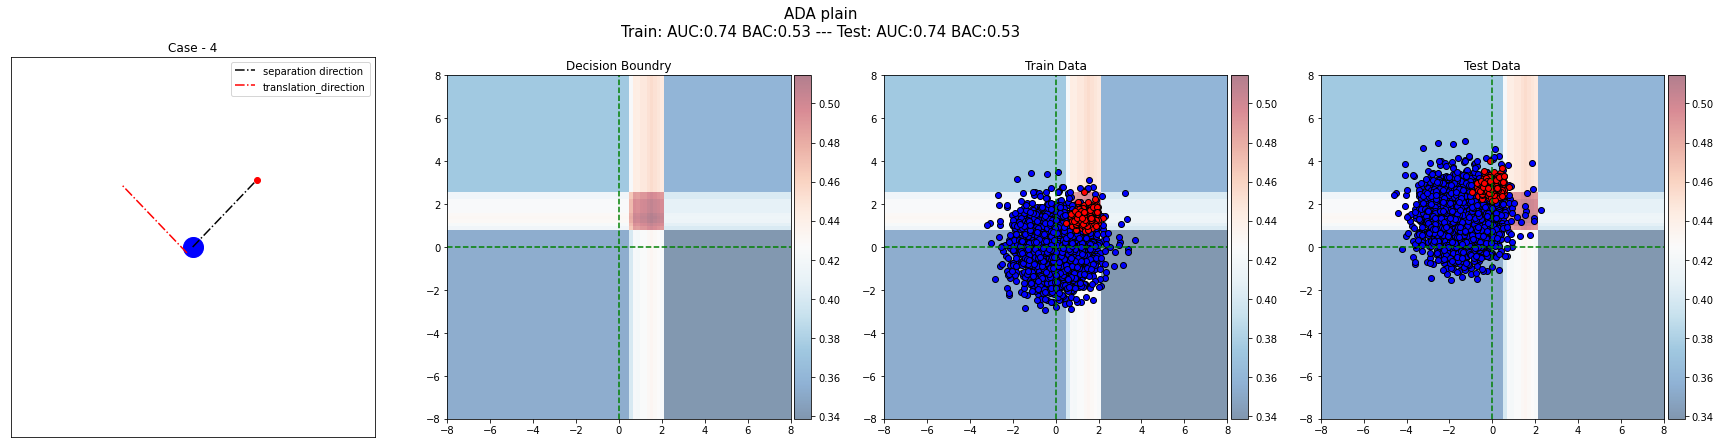

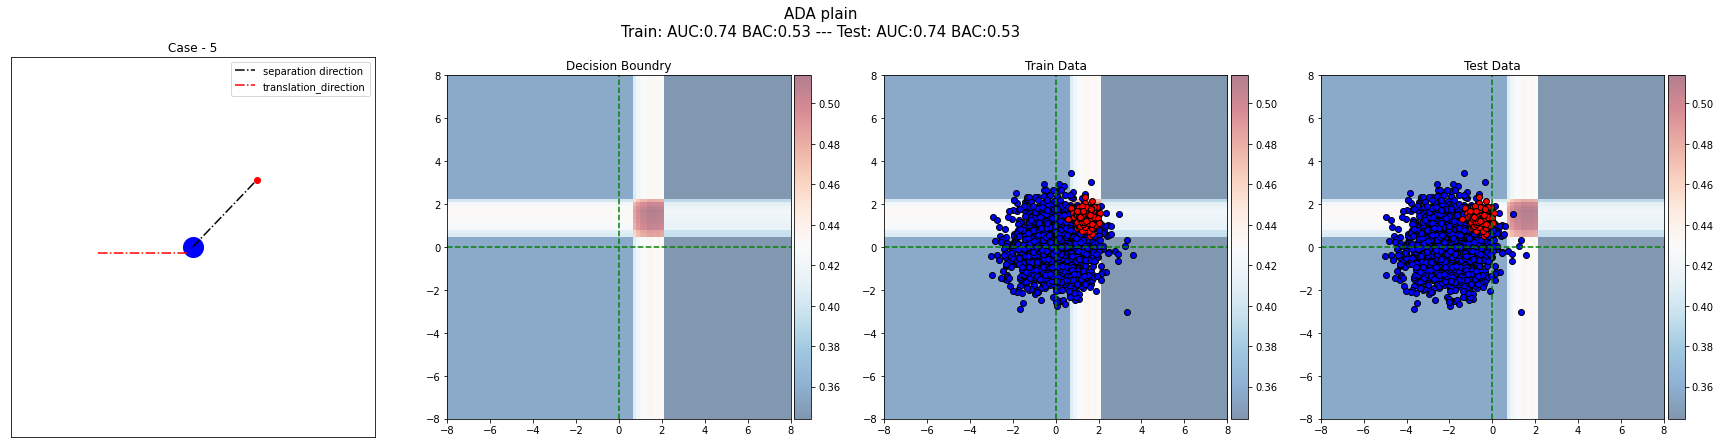

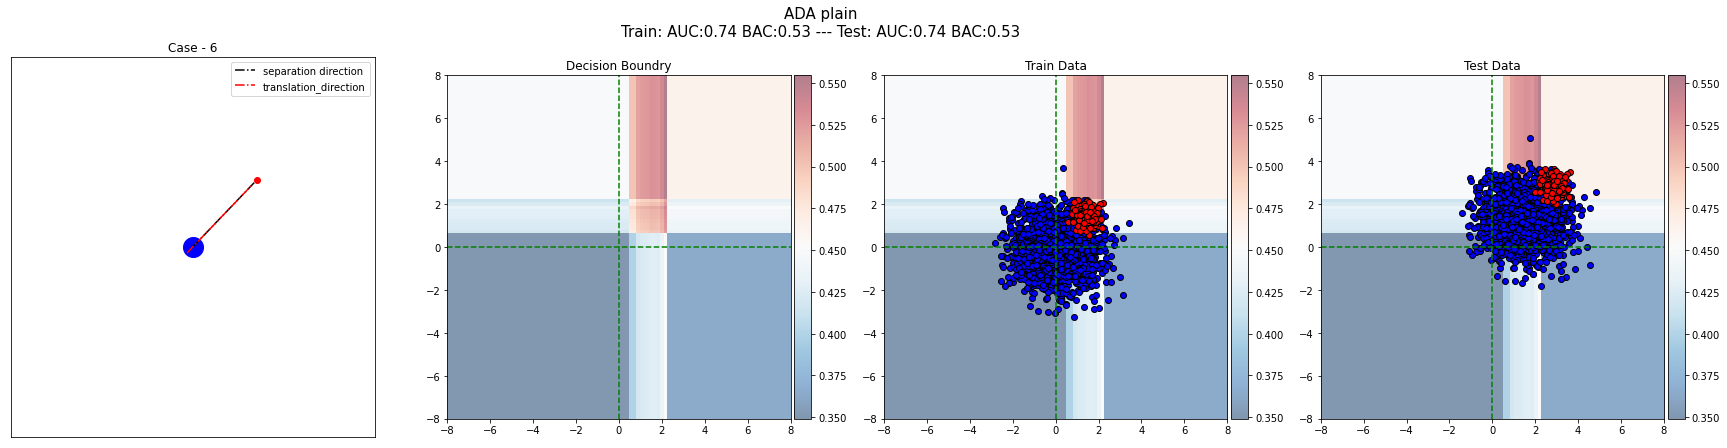

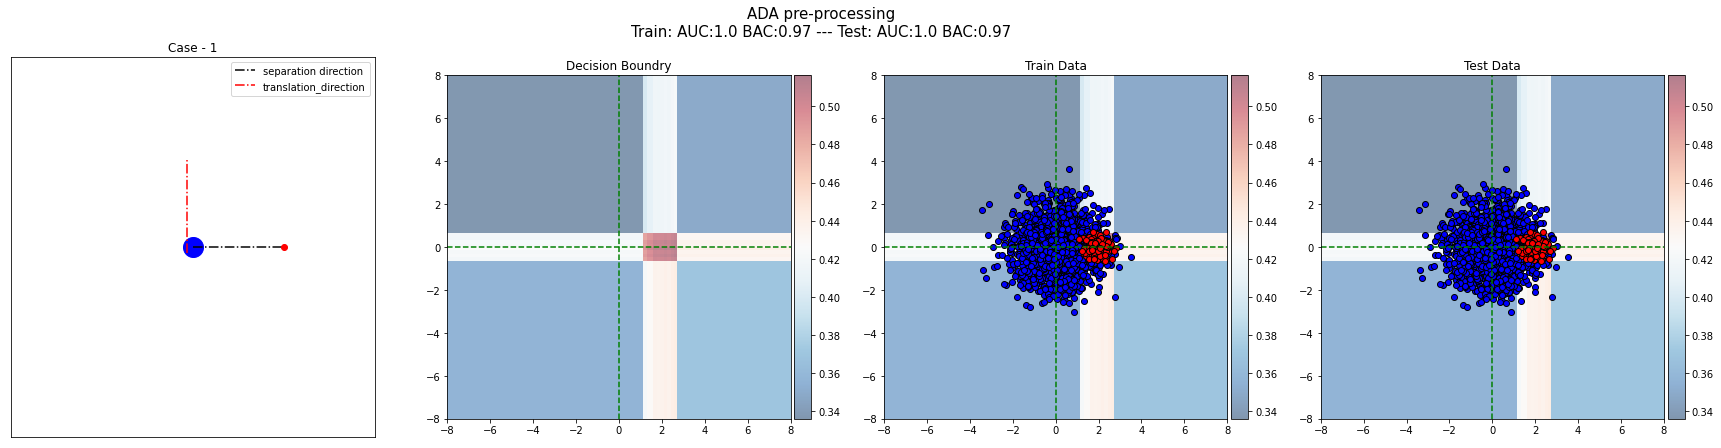

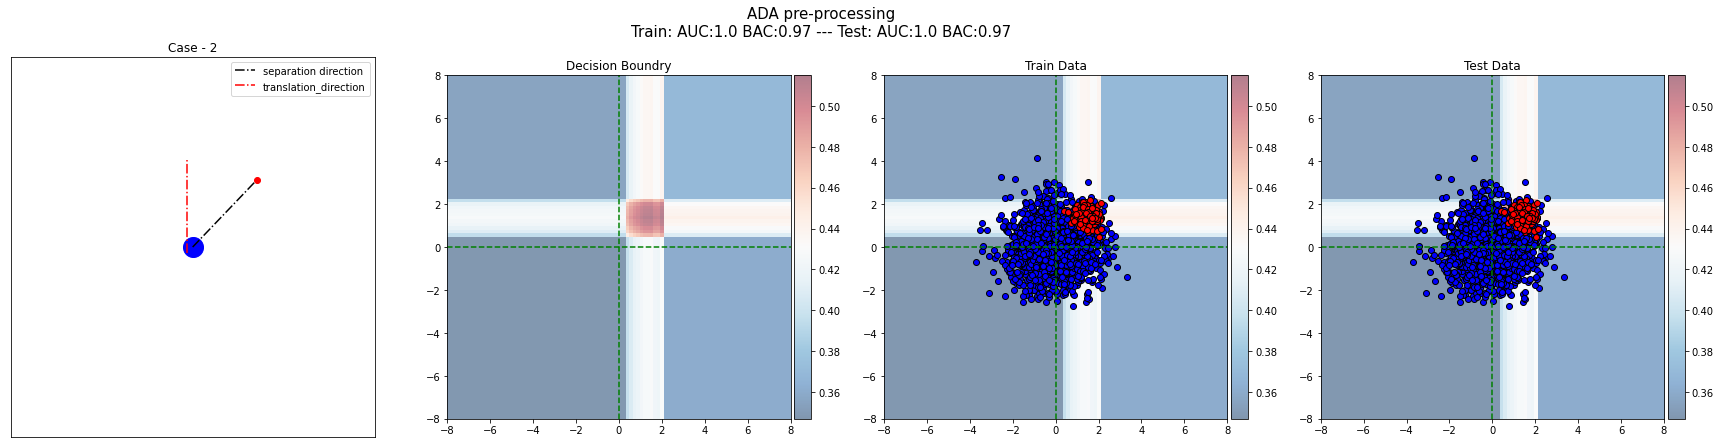

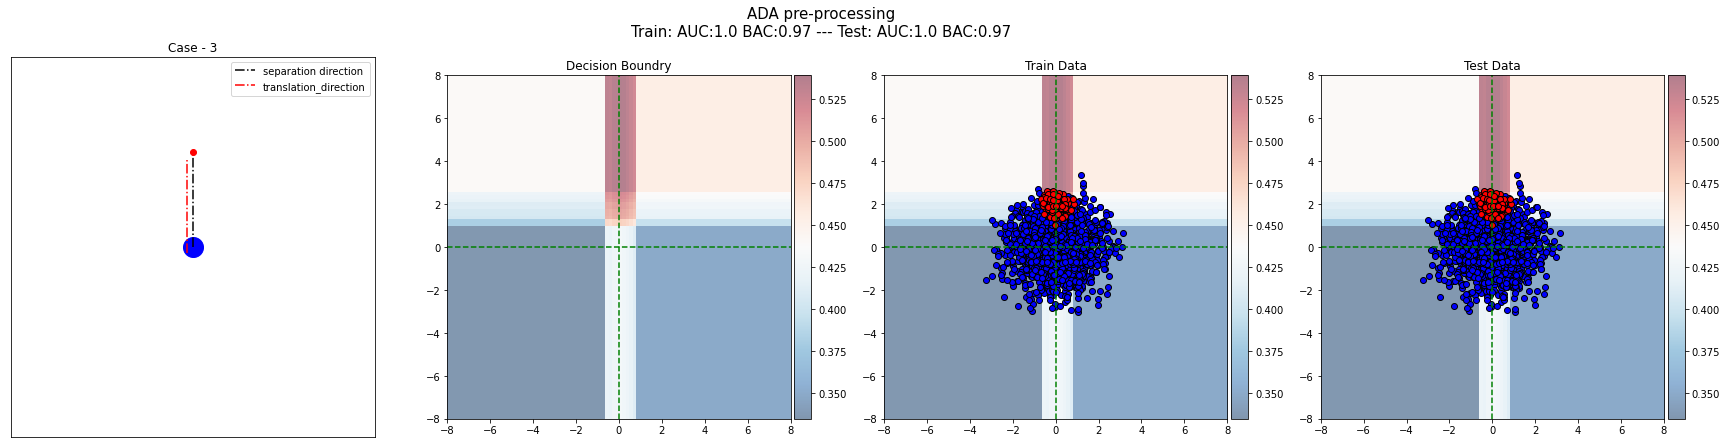

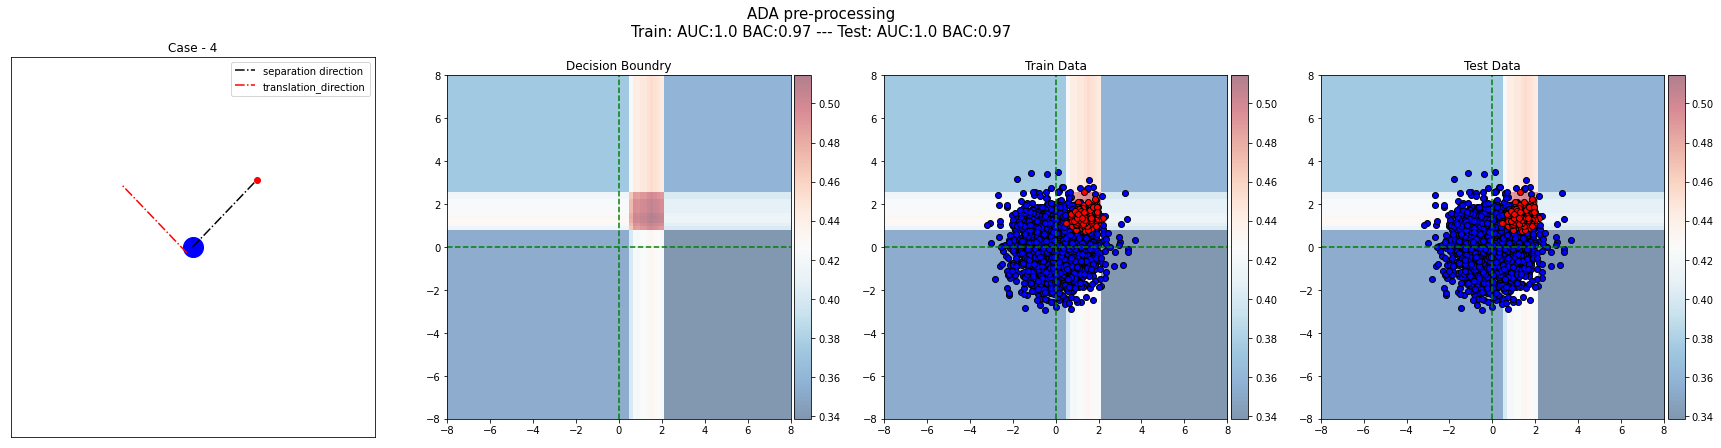

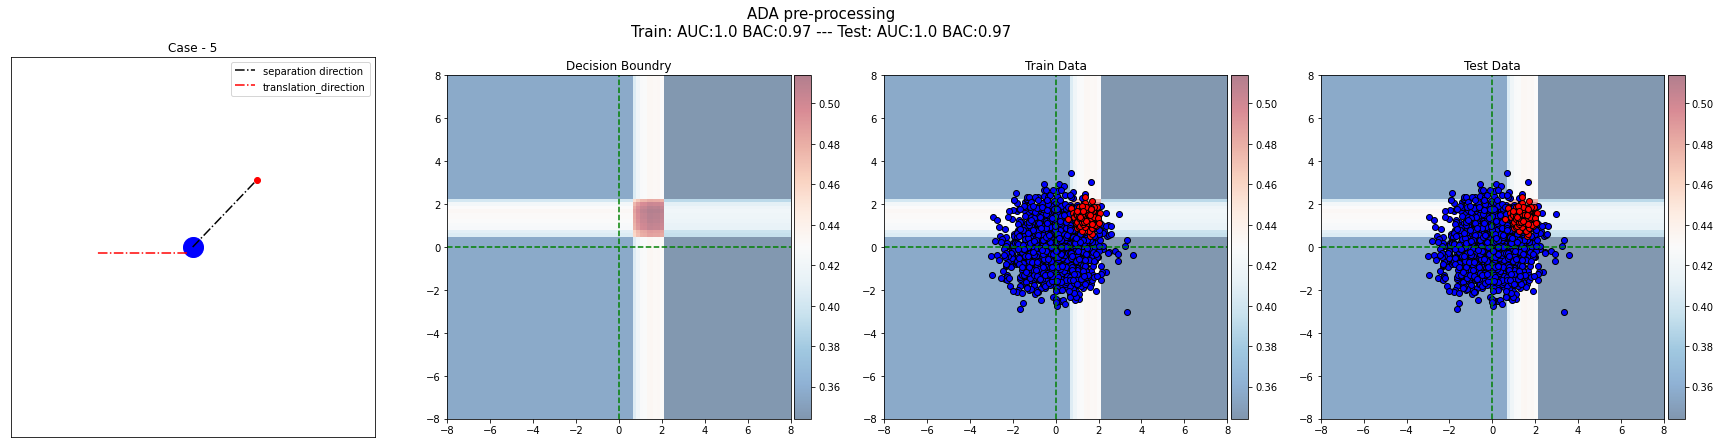

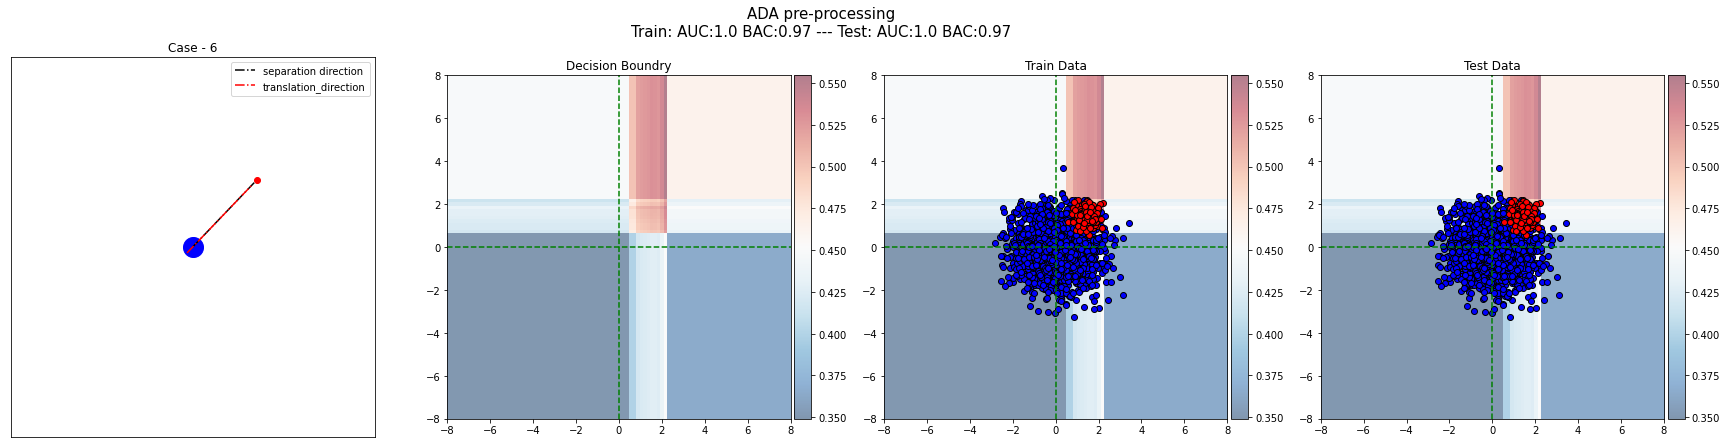

In [22]:
for model_s, result in zip(model_settings, results):
     if model_s["model_name"] != "Constant":
        if model_s["preprocessing"]:
             visualize_decicion_boundary(model_s["display_name"], settings, result, train_sets, test_sets_preprocessed)
        else:
             visualize_decicion_boundary(model_s["display_name"], settings, result, train_sets, test_sets)

***
# 6 - Scoring
***

In this section, we evaluate the two baselines using AUC score. AUC stands for "Area Under the Curve". And the curve under which we measure the area is the ROC curve (Receiver Operating Characteristic curve). For two-classes classification, this curve is the plot of the true positive rate (TPR) as a function of the false positive rate (FPR) for all the values of a decision threshold.

**True Positive Rate**  (**TPR**) is a synonym for recall and is therefore defined as follows:
$$
TPR = \frac{TP}{TP+FN}
$$
**False Positive Rate**  (**FPR**) is defined as follows:
$$
FPR = \frac{FP}{FP+TN}
$$

<div style="text-align: center">
<img src="https://developers.google.com/static/machine-learning/crash-course/images/ROCCurve.svg" width="400"/>
<br>
ROC Curve showing TPR vs. FPR at different classification thresholds
</div>

For example, if we assume that a model's output is kind of a probability (a real number between $0$ and $1$) that the input is in signal class, then you can set a threshold $t$, and decide to classify an input as signal iff the ouput probility is greater than $t$. For each value of $t$, this defines both a TPR($t$) and a FPR($t$). Then the points of the ROC curve have coordinates (FPR($t$),TPR($t$)) for all $t$ between $0$ and $1$.

<div style="text-align: center">
<img src="https://developers.google.com/static/machine-learning/crash-course/images/AUC.svg" width="400"/>
<br>
AUC (Area under the ROC Curve)
</div>

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

Source : https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=fr

In [23]:
train_columns = ["train_set 1", "train_set 2", "train_set 3", "train_set 4", "train_set 5", "train_set 6"]
test_columns = ["test_set 1", "test_set 2", "test_set 3", "test_set 4", "test_set 5", "test_set 6"]


train_aucs, test_aucs, train_bacs, test_bacs, indexes = [],[],[],[],[]
for model_s, result in zip(model_settings, results):
    indexes.append(model_s["display_name"])
    train_aucs.append(result["auc_trains"])
    test_aucs.append(result["auc_tests"])
    train_bacs.append(result["bac_trains"])
    test_bacs.append(result["bac_tests"])


score_auc_df_train = pd.DataFrame(data=train_aucs, columns=train_columns, index=indexes)
score_auc_df_test = pd.DataFrame(data=test_aucs, columns=test_columns, index=indexes)
score_bac_df_train = pd.DataFrame(data=train_bacs, columns=train_columns, index=indexes)
score_bac_df_test = pd.DataFrame(data=test_bacs, columns=test_columns, index=indexes)

score_auc_df_train["avg_auc"] = round(score_auc_df_train.iloc[:, 0:6].mean(axis=1), 2)
score_auc_df_test["avg_auc"] = round(score_auc_df_train.iloc[:, 0:6].mean(axis=1), 2)
score_bac_df_train["avg_bac"] = round(score_bac_df_train.iloc[:, 0:6].mean(axis=1), 2)
score_bac_df_test["avg_bac"] = round(score_bac_df_test.iloc[:, 0:6].mean(axis=1), 2)

score_auc_df_train.to_csv("scoring_output/auc_train.csv")
score_auc_df_test.to_csv("scoring_output/auc_test.csv")
score_bac_df_train.to_csv("scoring_output/bac_train.csv")
score_bac_df_test.to_csv("scoring_output/bac_test.csv")


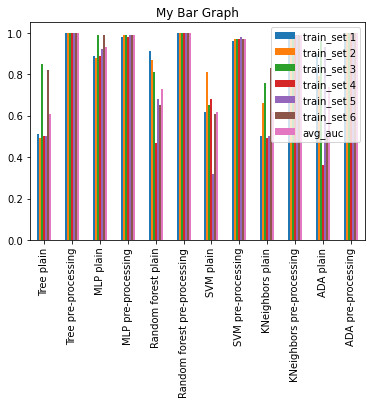

train_set 1  train_set 2  train_set 3  \
Tree plain                           0.51         0.49         0.85   
Tree pre-processing                  1.00         1.00         1.00   
MLP plain                            0.89         0.88         0.99   
MLP pre-processing                   0.98         0.99         0.99   
Random forest plain                  0.91         0.87         0.81   
Random forest pre-processing         1.00         1.00         1.00   
SVM plain                            0.62         0.81         0.65   
SVM pre-processing                   0.96         0.97         0.97   
KNeighbors plain                     0.50         0.66         0.76   
KNeighbors pre-processing            0.99         0.99         1.00   
ADA plain                            0.90         0.79         0.96   
ADA pre-processing                   1.00         1.00         1.00   

                              train_set 4  train_set 5  train_set 6  avg_auc  
Tree plain                           0.50         0.50         0.82     0.61  
Tree pre-processing                  1.00         1.00         1.00     1.00  
MLP plain                            0.89         0.92         0.99     0.93  
MLP pre-processing                   0.98         0.99         0.99     0.99  
Random forest plain                  0.47         0.68         0.65     0.73  
Random forest pre-processing         1.00         1.00         1.00     1.00  
SVM plain                            0.68         0.32         0.61     0.62  
SVM pre-processing                   0.97         0.98         0.97     0.97  
KNeighbors plain                     0.49         0.50         0.83     0.62  
KNeighbors pre-processing            0.99         0.99         0.99     0.99  
ADA plain                            0.36         0.93         0.50     0.74  
ADA pre-processing                   1.00         1.00         1.00     1.00

In [24]:
ax = score_auc_df_train.plot(kind='bar', title='My Bar Graph')
plt.show()

score_auc_df_train

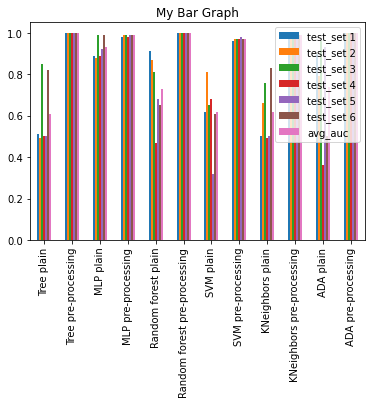

test_set 1  test_set 2  test_set 3  test_set 4  \
Tree plain                          0.51        0.49        0.85        0.50   
Tree pre-processing                 1.00        1.00        1.00        1.00   
MLP plain                           0.89        0.88        0.99        0.89   
MLP pre-processing                  0.98        0.99        0.99        0.98   
Random forest plain                 0.91        0.87        0.81        0.47   
Random forest pre-processing        1.00        1.00        1.00        1.00   
SVM plain                           0.62        0.81        0.65        0.68   
SVM pre-processing                  0.96        0.97        0.97        0.97   
KNeighbors plain                    0.50        0.66        0.76        0.49   
KNeighbors pre-processing           0.99        0.99        1.00        0.99   
ADA plain                           0.90        0.79        0.96        0.36   
ADA pre-processing                  1.00        1.00        1.00        1.00   

                              test_set 5  test_set 6  avg_auc  
Tree plain                          0.50        0.82     0.61  
Tree pre-processing                 1.00        1.00     1.00  
MLP plain                           0.92        0.99     0.93  
MLP pre-processing                  0.99        0.99     0.99  
Random forest plain                 0.68        0.65     0.73  
Random forest pre-processing        1.00        1.00     1.00  
SVM plain                           0.32        0.61     0.62  
SVM pre-processing                  0.98        0.97     0.97  
KNeighbors plain                    0.50        0.83     0.62  
KNeighbors pre-processing           0.99        0.99     0.99  
ADA plain                           0.93        0.50     0.74  
ADA pre-processing                  1.00        1.00     1.00

In [25]:
ax = score_auc_df_test.plot(kind='bar', title='My Bar Graph')
plt.show()

score_auc_df_test

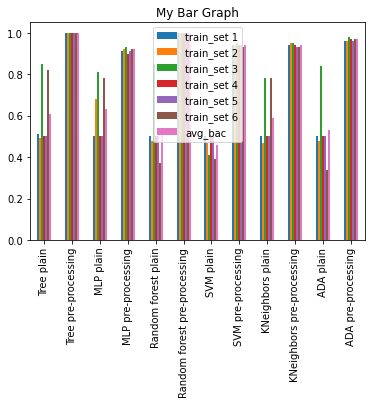

train_set 1  train_set 2  train_set 3  \
Tree plain                           0.51         0.49         0.85   
Tree pre-processing                  1.00         1.00         1.00   
MLP plain                            0.50         0.68         0.81   
MLP pre-processing                   0.91         0.92         0.93   
Random forest plain                  0.50         0.48         0.85   
Random forest pre-processing         1.00         1.00         1.00   
SVM plain                            0.50         0.47         0.41   
SVM pre-processing                   0.94         0.94         0.95   
KNeighbors plain                     0.50         0.47         0.78   
KNeighbors pre-processing            0.94         0.95         0.95   
ADA plain                            0.50         0.48         0.84   
ADA pre-processing                   0.96         0.96         0.98   

                              train_set 4  train_set 5  train_set 6  avg_bac  
Tree plain                           0.50         0.50         0.82     0.61  
Tree pre-processing                  1.00         1.00         1.00     1.00  
MLP plain                            0.50         0.50         0.78     0.63  
MLP pre-processing                   0.90         0.91         0.92     0.92  
Random forest plain                  0.50         0.50         0.37     0.53  
Random forest pre-processing         1.00         1.00         1.00     1.00  
SVM plain                            0.50         0.50         0.39     0.46  
SVM pre-processing                   0.94         0.94         0.93     0.94  
KNeighbors plain                     0.50         0.50         0.78     0.59  
KNeighbors pre-processing            0.94         0.93         0.93     0.94  
ADA plain                            0.50         0.50         0.34     0.53  
ADA pre-processing                   0.97         0.96         0.97     0.97

In [26]:
ax = score_bac_df_train.plot(kind='bar', title='My Bar Graph')
plt.show()

score_bac_df_train

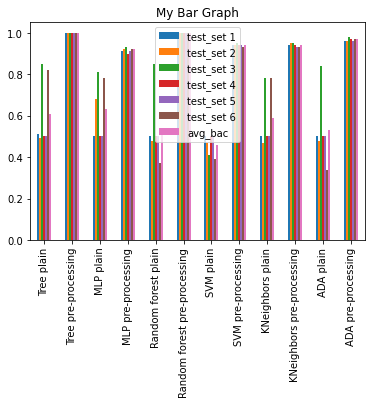

test_set 1  test_set 2  test_set 3  test_set 4  \
Tree plain                          0.51        0.49        0.85        0.50   
Tree pre-processing                 1.00        1.00        1.00        1.00   
MLP plain                           0.50        0.68        0.81        0.50   
MLP pre-processing                  0.91        0.92        0.93        0.90   
Random forest plain                 0.50        0.48        0.85        0.50   
Random forest pre-processing        1.00        1.00        1.00        1.00   
SVM plain                           0.50        0.47        0.41        0.50   
SVM pre-processing                  0.94        0.94        0.95        0.94   
KNeighbors plain                    0.50        0.47        0.78        0.50   
KNeighbors pre-processing           0.94        0.95        0.95        0.94   
ADA plain                           0.50        0.48        0.84        0.50   
ADA pre-processing                  0.96        0.96        0.98        0.97   

                              test_set 5  test_set 6  avg_bac  
Tree plain                          0.50        0.82     0.61  
Tree pre-processing                 1.00        1.00     1.00  
MLP plain                           0.50        0.78     0.63  
MLP pre-processing                  0.91        0.92     0.92  
Random forest plain                 0.50        0.37     0.53  
Random forest pre-processing        1.00        1.00     1.00  
SVM plain                           0.50        0.39     0.46  
SVM pre-processing                  0.94        0.93     0.94  
KNeighbors plain                    0.50        0.78     0.59  
KNeighbors pre-processing           0.93        0.93     0.94  
ADA plain                           0.50        0.34     0.53  
ADA pre-processing                  0.96        0.97     0.97

In [27]:
ax = score_bac_df_test.plot(kind='bar', title='My Bar Graph')
plt.show()

score_bac_df_test

***
# 7 - Submissions
***

### Unit Testing 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.<br>

<code>python3</code> is required for this step

**Test Ingestion Program**

In [26]:
!python3 $problem_dir/ingestion.py

Python est introuvable. Exécutez sans argument pour procéder à l


**Test Scoring Program**

In [27]:
!python3 $score_dir/score.py

Python est introuvable. Exécutez sans argument pour procéder à l


### Prepare the submission

In [28]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_23-03-20-19-23.zip
../sample_result_submission_23-03-20-19-23.zip
